In [71]:
import numpy as np
import pandas as pd
# import numpy & pandas

# pip install jedi
# # for auto completion
# pd.options.display.max_columns=500
# pd.options.display.max_rows=200
# to set dataframes to show more cols & rows

import seaborn as sns   
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp
# import statsmodels for statistical modelling
from statsmodels.stats.outliers_influence import variance_inflation_factor
# importing VIF

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
# import scikit-learn for machine learning

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sb
import pylab
from pylab import plot, show
from pylab import legend, title, xlabel, ylabel
# importing matplotlib & seaborn for plotting graphs
import os
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import chi2_contingency

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,recall_score,precision_score,f1_score,accuracy_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import RFE

In [2]:
df=pd.read_csv('data.csv')

In [3]:
df.head()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594          
1          1                                           0.464291          
2          1                                           0.426071          
3          1                                           0.399844          
4          1                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   
2                 0.601450                      0.601364   
3                 0.583541                      0.583541   
4                 0.598783                      0.598783   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.796887   
1                0.998946                    0.797380   
2                0.998857                    0.796403   
3                0.998700                    0.796967   
4                0.998973                    0.797366   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.808809                                      0.302646   
1                      0.809301                                      0.303556   
2                      0.808388                                      0.302035   
3                      0.808966                                      0.303350   
4                      0.809304                                      0.303475   

   ...   Net Income to Total Assets   Total assets to GNP price  \
0  ...                     0.716845                    0.009219   
1  ...                     0.795297                    0.008323   
2  ...                     0.774670                    0.040003   
3  ...                     0.739555                    0.003252   
4  ...                     0.795016                    0.003878   

    No-credit Interval   Gross Profit to Sales  \
0             0.622879                0.601453   
1             0.623652                0.610237   
2             0.623841                0.601449   
3             0.622929                0.583538   
4             0.623521                0.598782   

    Net Income to Stockholder's Equity   Liability to Equity  \
0                             0.827890              0.290202   
1                             0.839969              0.283846   
2                             0.836774              0.290189   
3                             0.834697              0.281721   
4                             0.839973              0.278514   

    Degree of Financial Leverage (DFL)  \
0                             0.026601   
1                             0.264577   
2                             0.026555   
3                             0.026697   
4                             0.024752   

    Interest Coverage Ratio (Interest expense to EBIT)   Net Income Flag  \
0                                           0.564050                   1   
1                                           0.570175                   1   
2                                           0.563706                   1   
3                                           0.564663                   1   
4                        

In [4]:
df.shape

(6819, 96)

In [5]:
pd.set_option('display.max_columns',300) # This will display maximum 400 columns.
pd.set_option('display.max_rows',300) #  # This will display maximum 400 Rows.

## Handle missing values appropriately.

In [6]:
df.isnull().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
 Realized Sales Gross Margin                                0
 Operating Profit Rate                                      0
 Pre-tax net Interest Rate                                  0
 After-tax net Interest Rate                                0
 Non-industry income and expenditure/revenue                0
 Continuous interest rate (after tax)                       0
 Operating Expense Rate                                     0
 Research and development expense rate                      0
 Cash flow rate                                             0
 Interest-bearing debt interest rate                        0
 Tax rate (A)                                               0
 Net Val

# Rename the columns.

In [7]:
df.columns = df.columns.str.replace(' ', '')

In [8]:
df.columns = df.columns.str.replace('/', '')

In [9]:
df.columns = df.columns.str.replace('%', '')

In [10]:
df.columns = df.columns.str.replace('-', '_')

In [11]:
df.columns = df.columns.str.replace('?', '')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Bankrupt                                           6819 non-null   int64  
 1   ROA(C)beforeinterestanddepreciationbeforeinterest  6819 non-null   float64
 2   ROA(A)beforeinterestandaftertax                    6819 non-null   float64
 3   ROA(B)beforeinterestanddepreciationaftertax        6819 non-null   float64
 4   OperatingGrossMargin                               6819 non-null   float64
 5   RealizedSalesGrossMargin                           6819 non-null   float64
 6   OperatingProfitRate                                6819 non-null   float64
 7   Pre_taxnetInterestRate                             6819 non-null   float64
 8   After_taxnetInterestRate                           6819 non-null   float64
 9   Non_indu

In [13]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
6814    False
6815    False
6816    False
6817    False
6818    False
Length: 6819, dtype: bool

In [14]:
columns_to_drop = ['NetIncomeFlag','Liability_AssetsFlag','Bankrupt',]
newdf=df.drop(columns=columns_to_drop)

In [15]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 93 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   ROA(C)beforeinterestanddepreciationbeforeinterest  6819 non-null   float64
 1   ROA(A)beforeinterestandaftertax                    6819 non-null   float64
 2   ROA(B)beforeinterestanddepreciationaftertax        6819 non-null   float64
 3   OperatingGrossMargin                               6819 non-null   float64
 4   RealizedSalesGrossMargin                           6819 non-null   float64
 5   OperatingProfitRate                                6819 non-null   float64
 6   Pre_taxnetInterestRate                             6819 non-null   float64
 7   After_taxnetInterestRate                           6819 non-null   float64
 8   Non_industryincomeandexpenditurerevenue            6819 non-null   float64
 9   Continuo

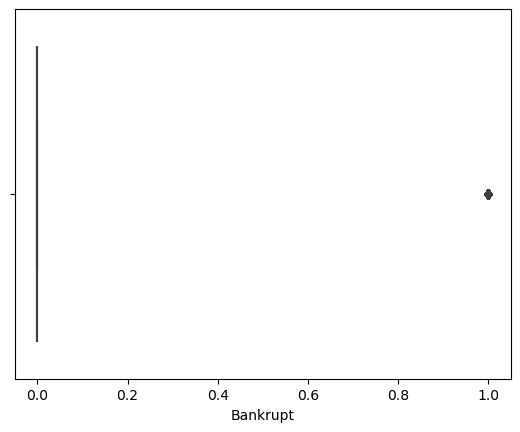

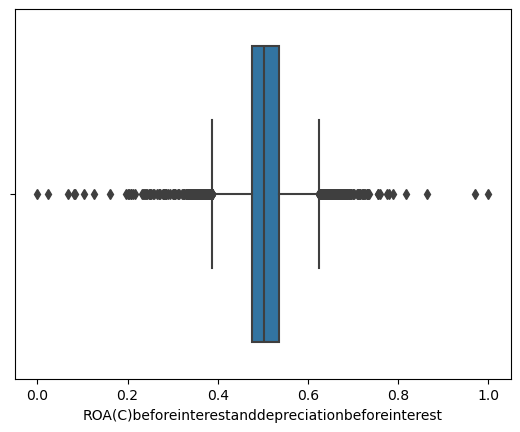

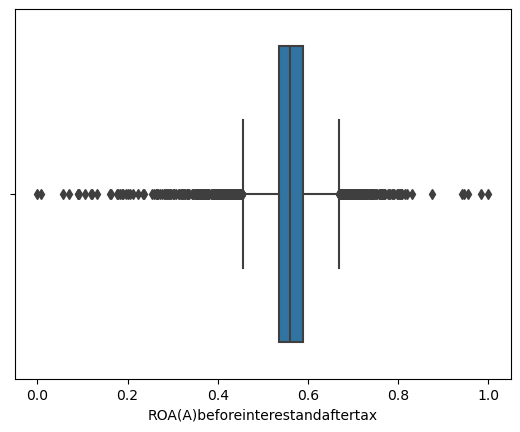

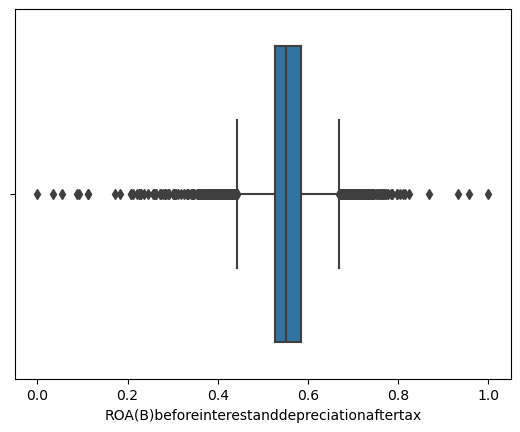

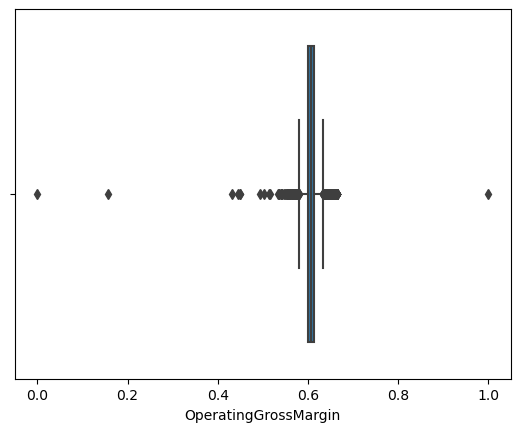

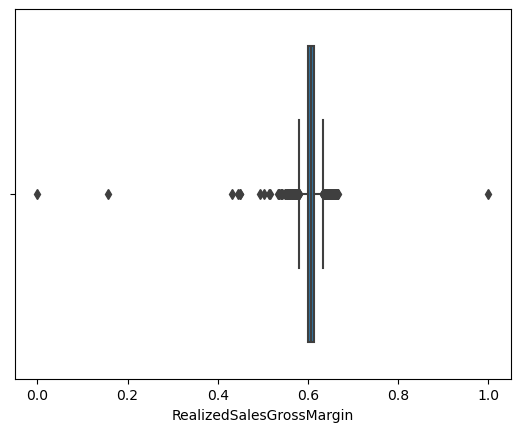

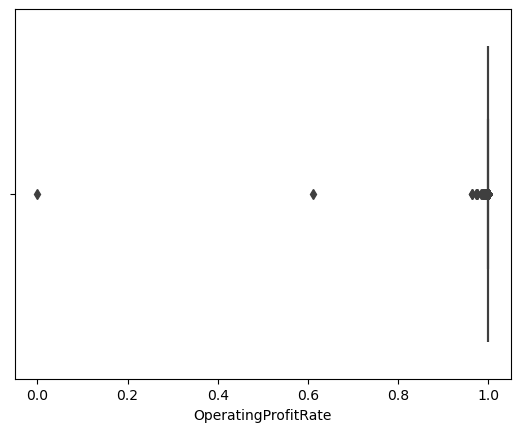

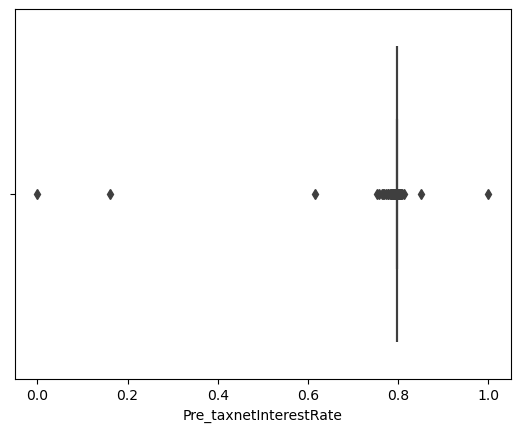

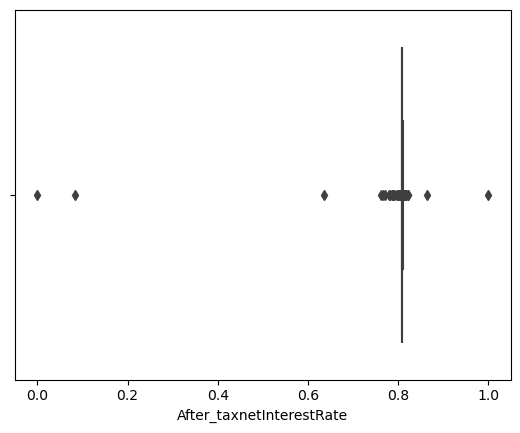

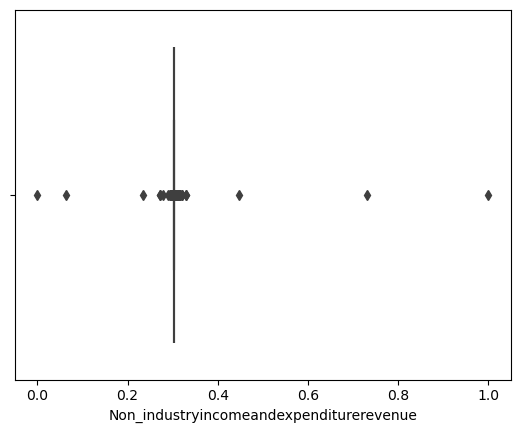

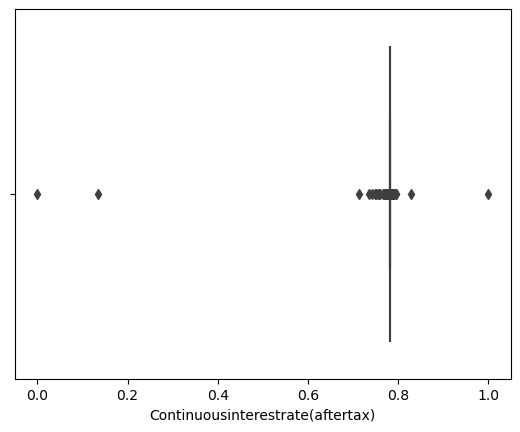

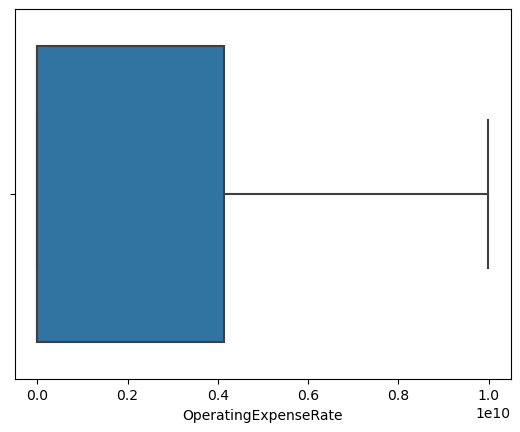

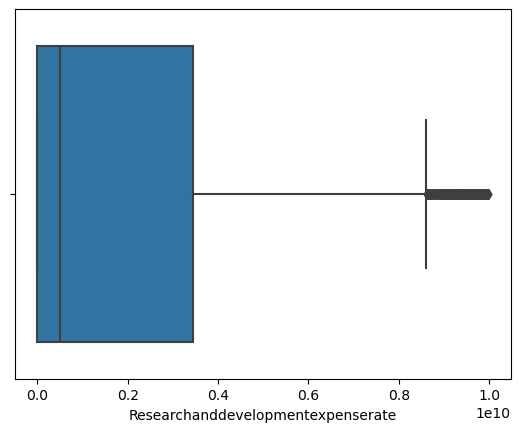

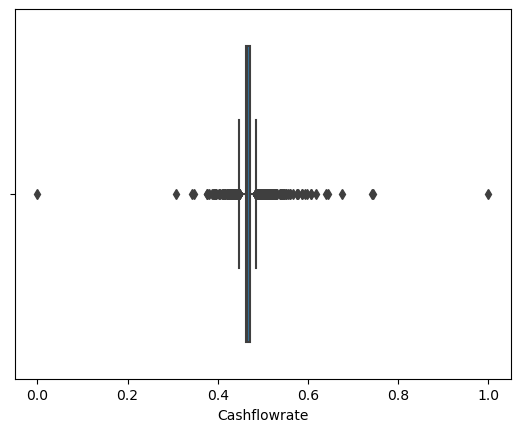

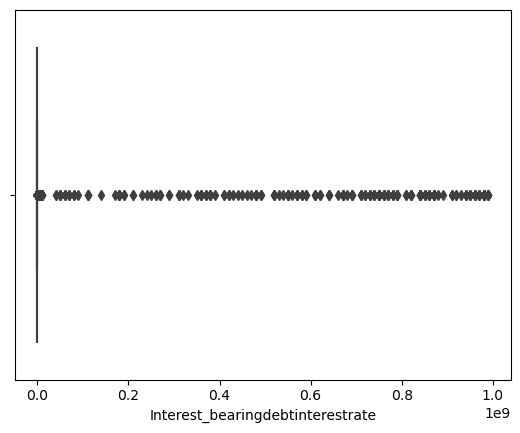

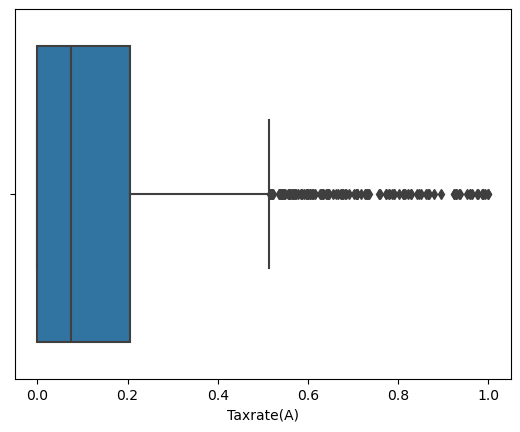

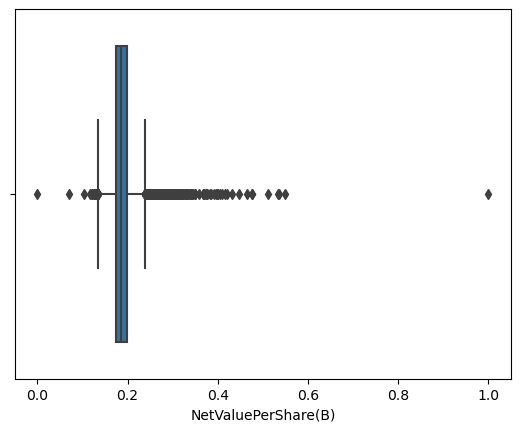

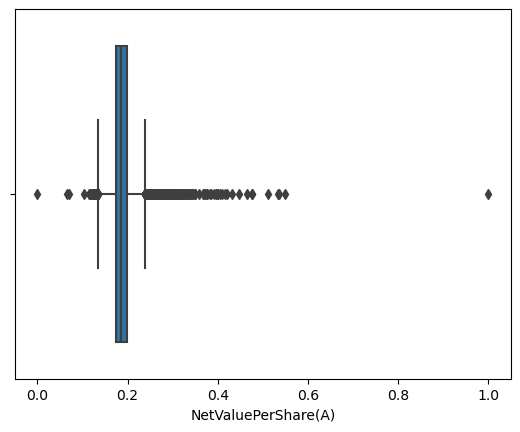

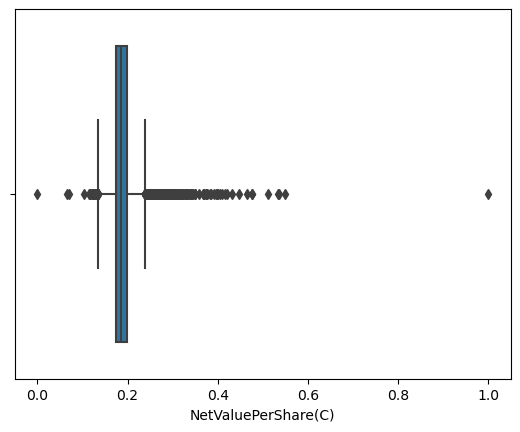

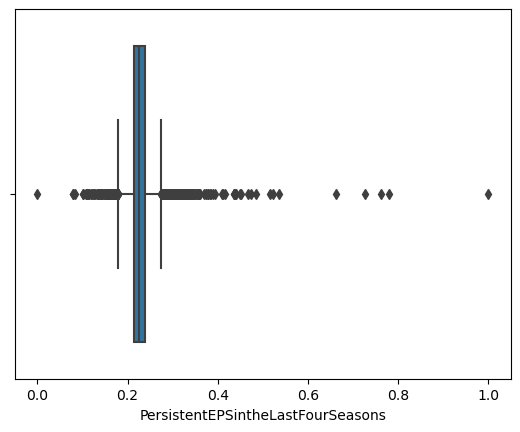

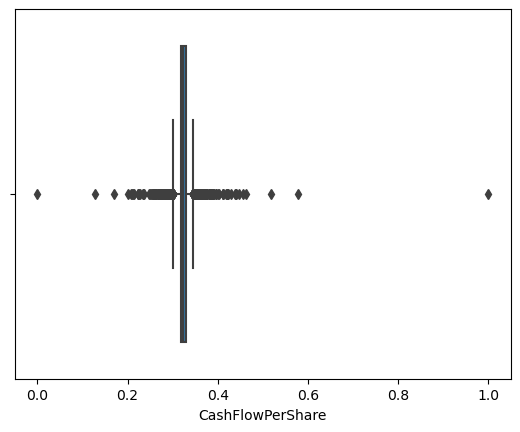

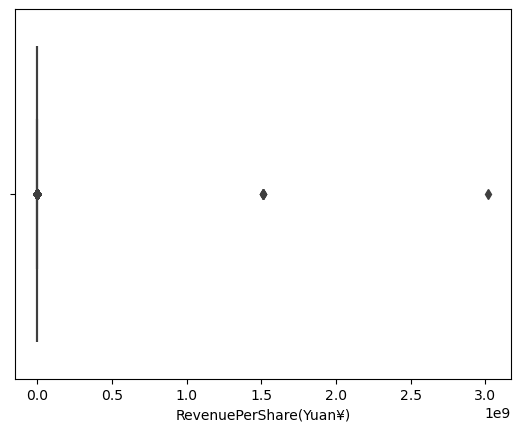

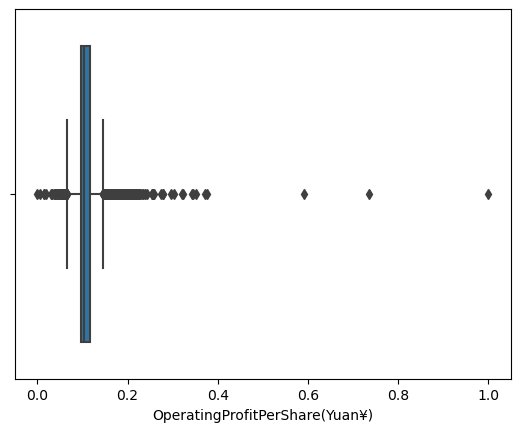

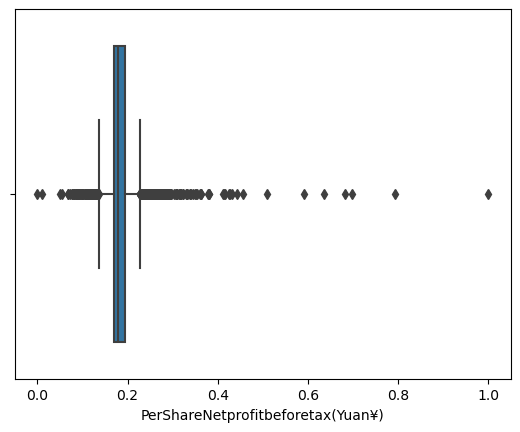

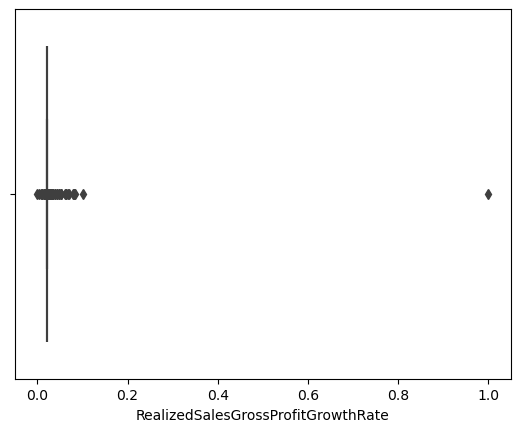

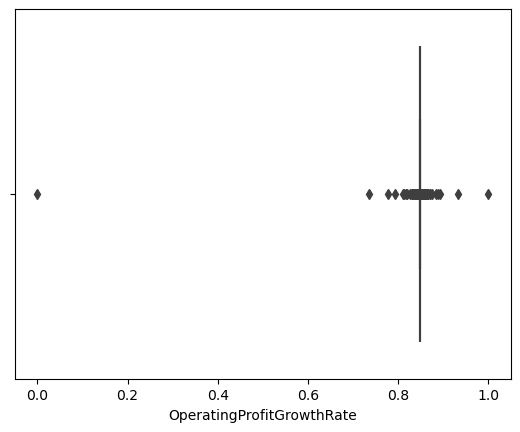

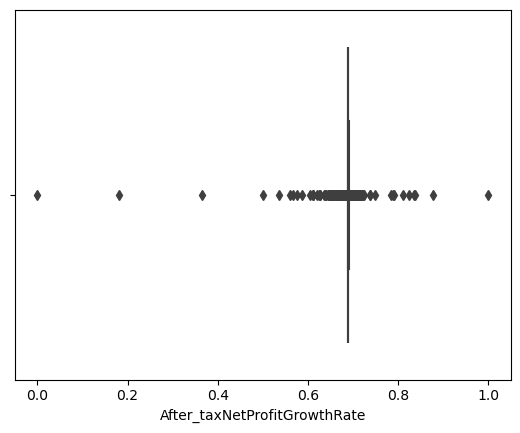

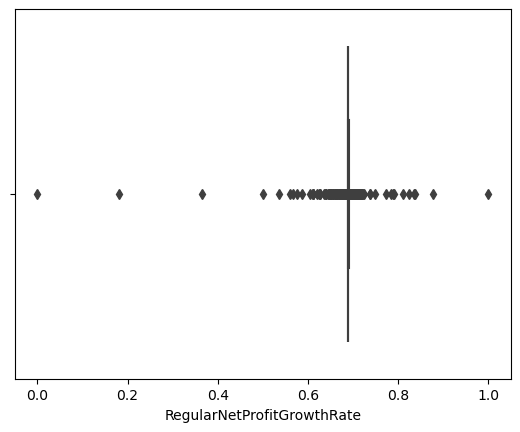

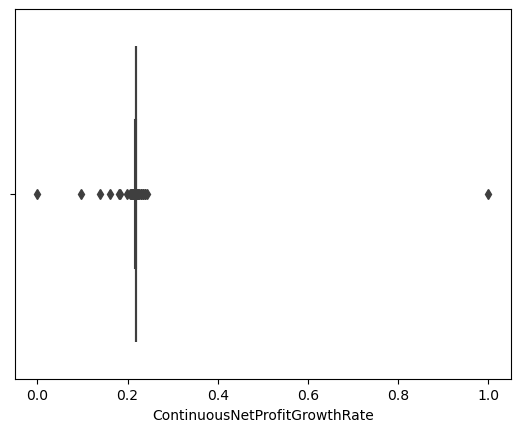

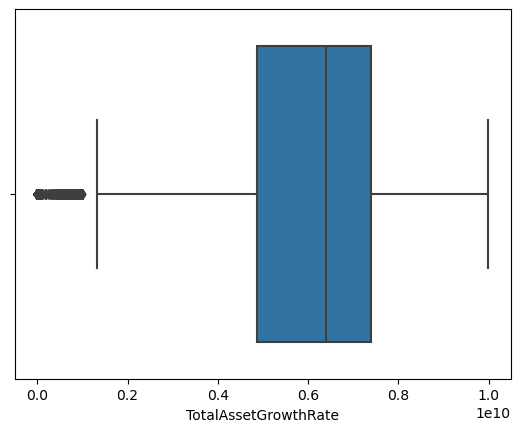

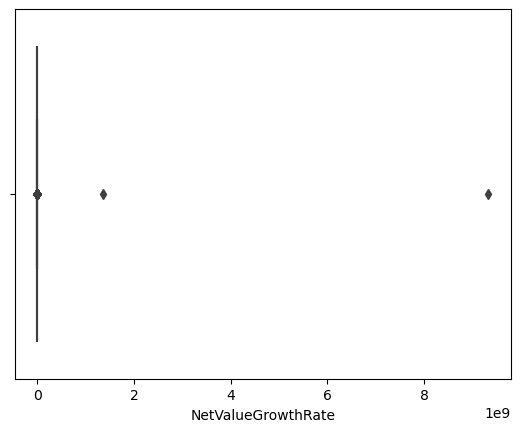

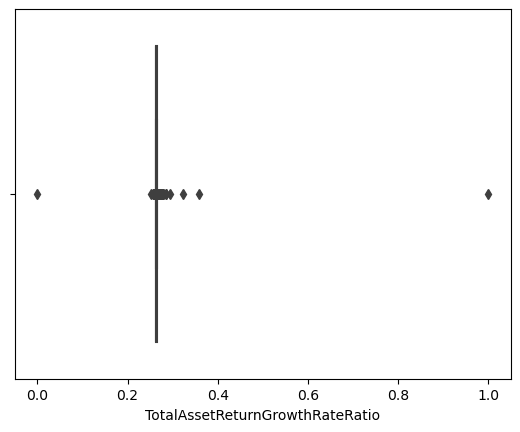

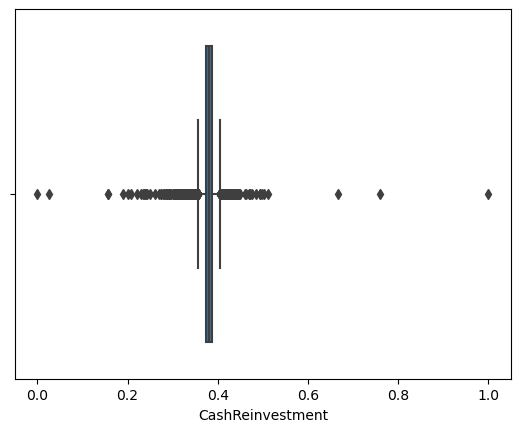

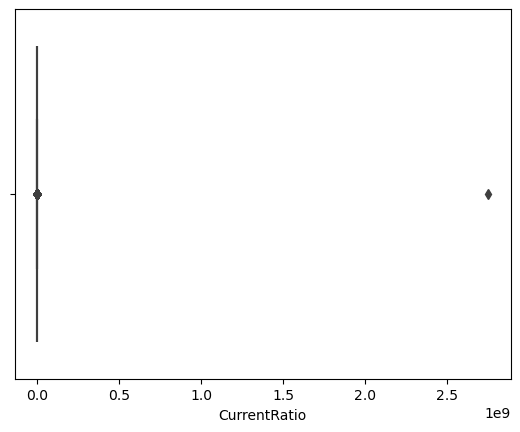

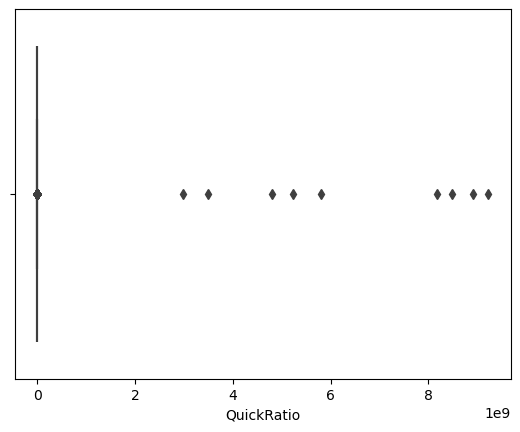

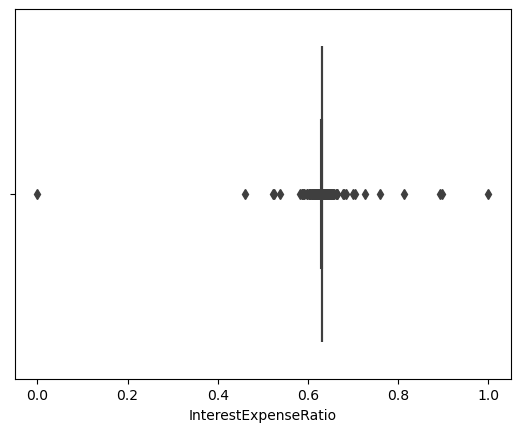

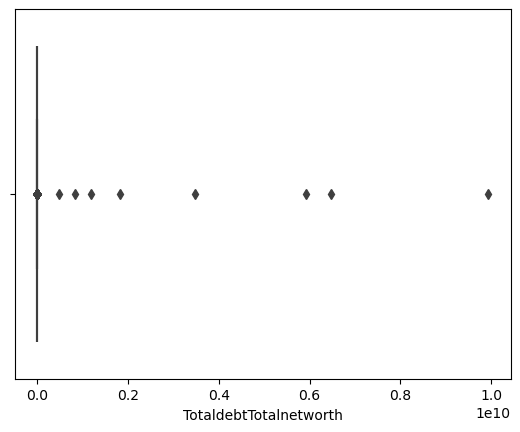

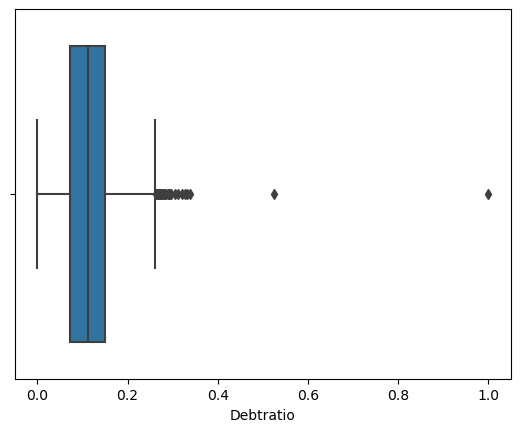

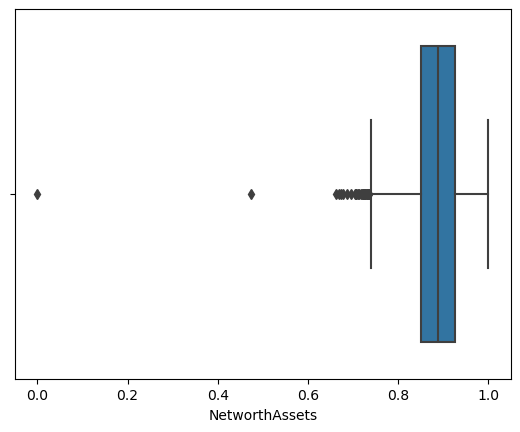

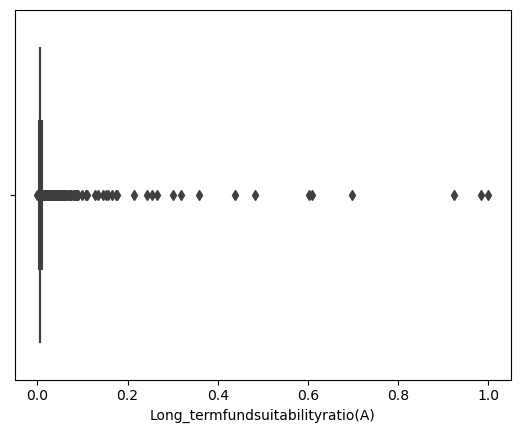

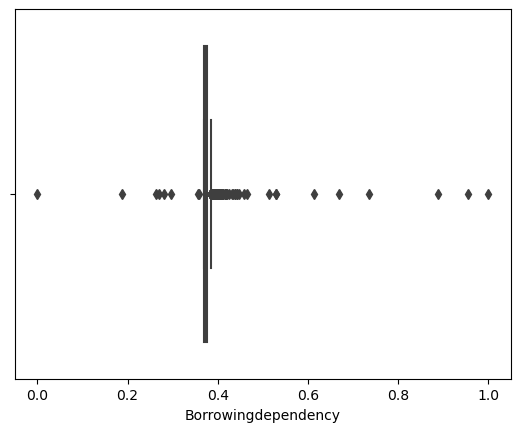

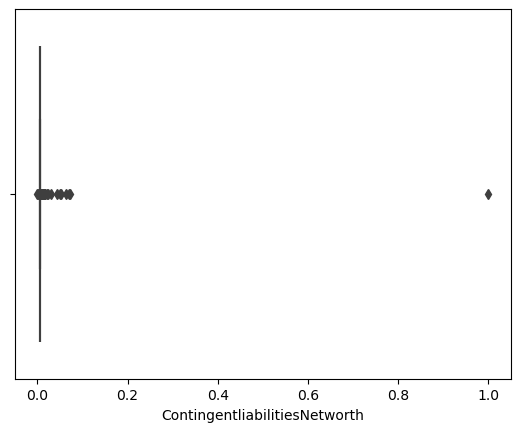

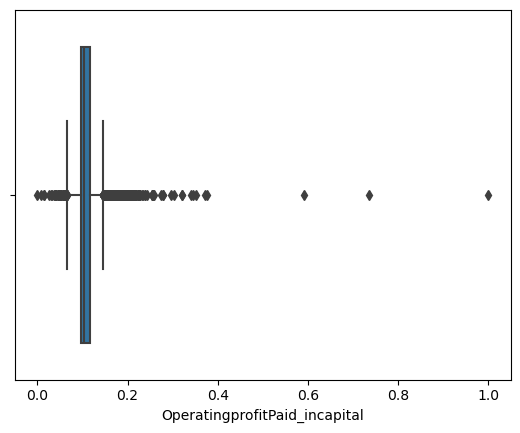

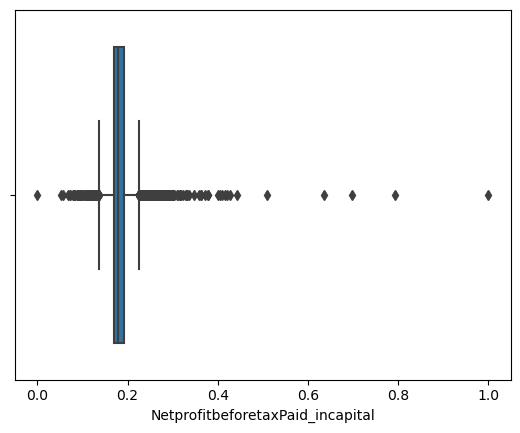

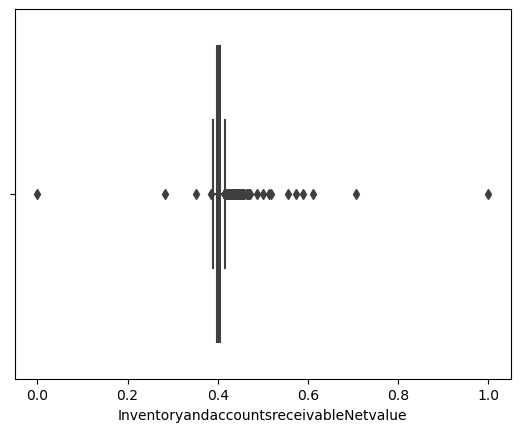

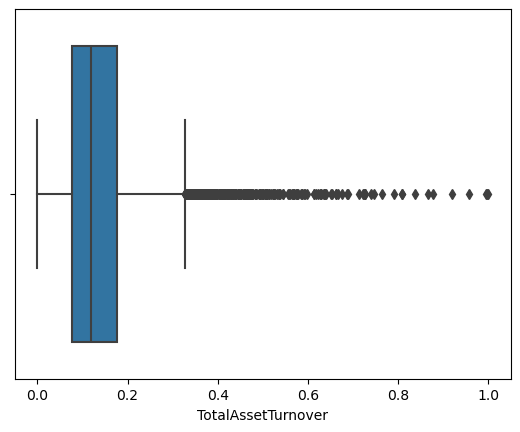

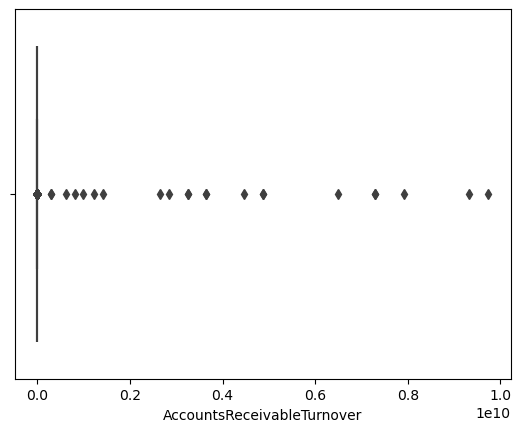

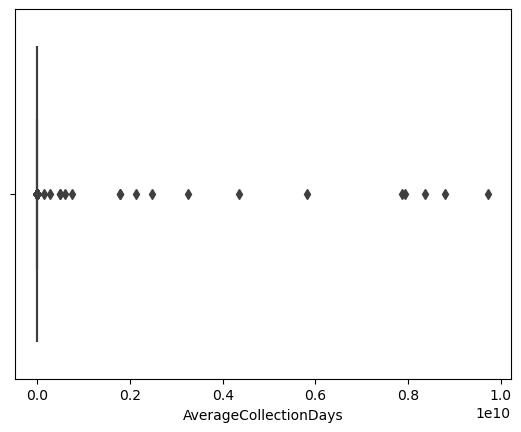

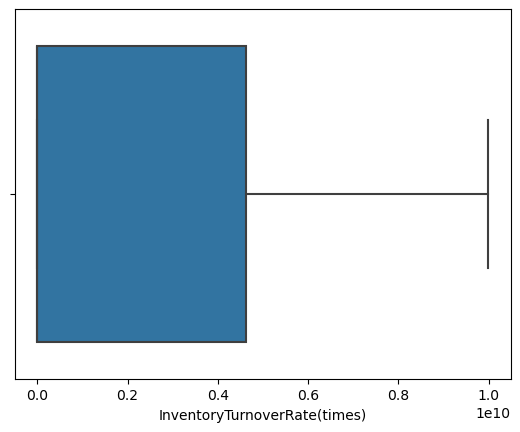

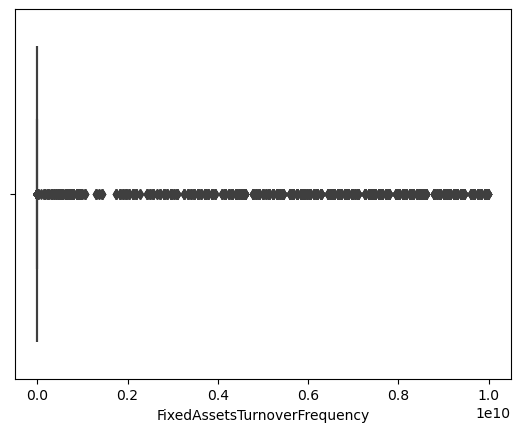

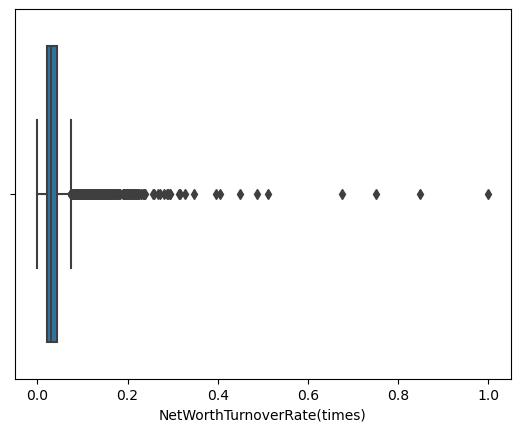

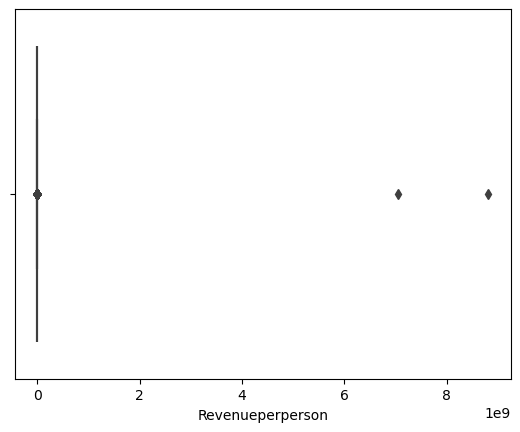

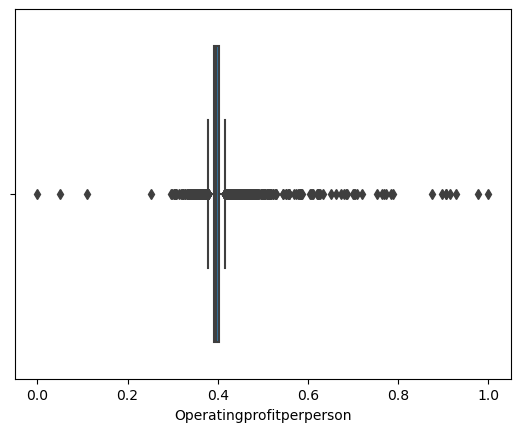

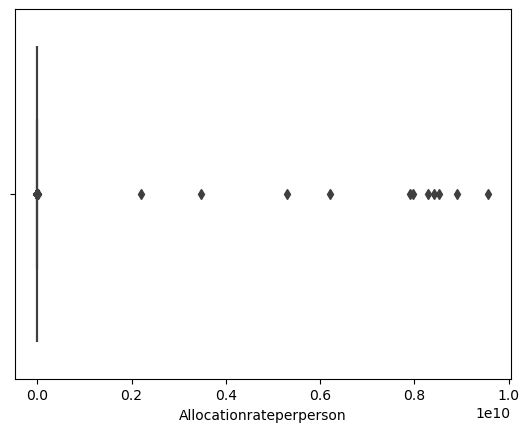

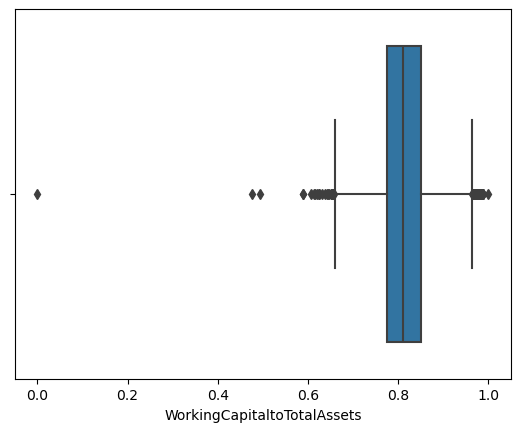

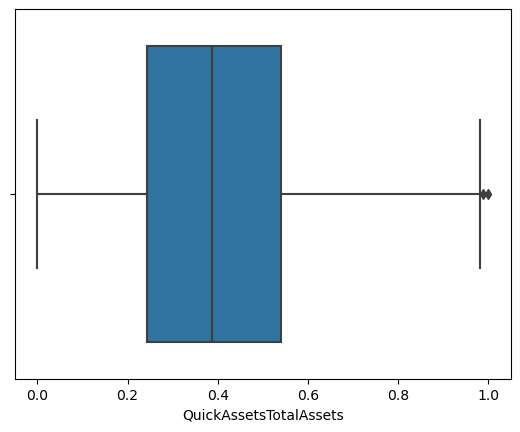

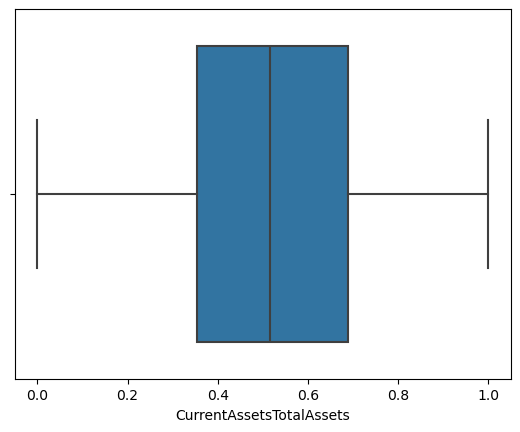

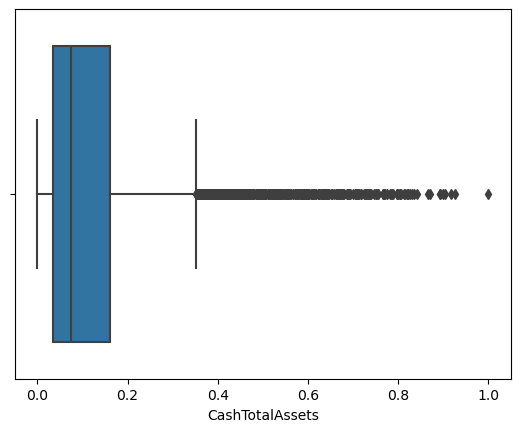

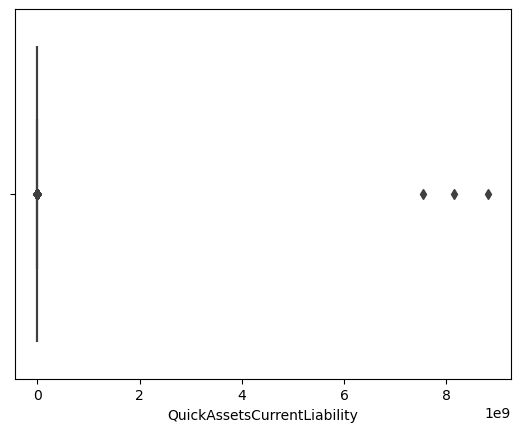

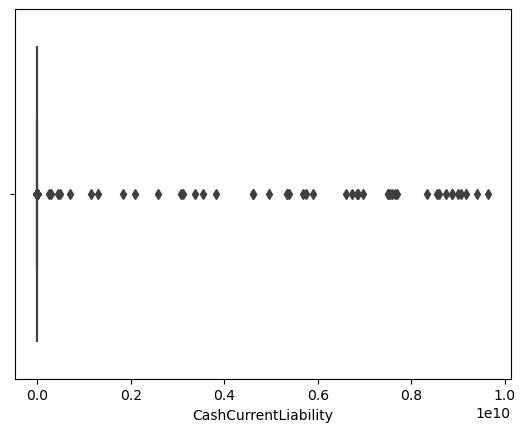

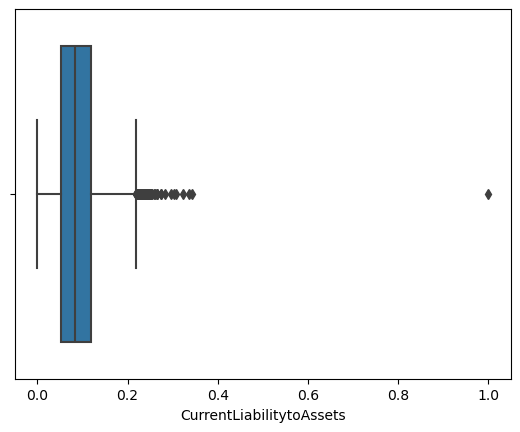

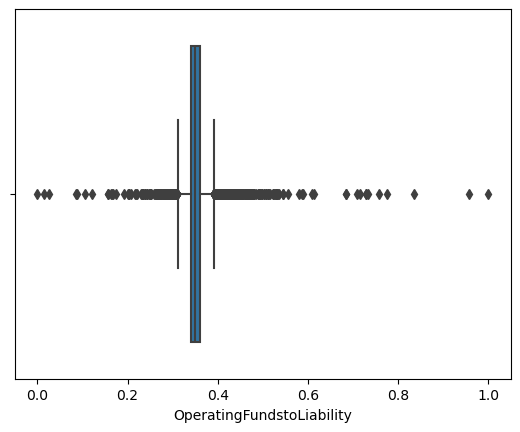

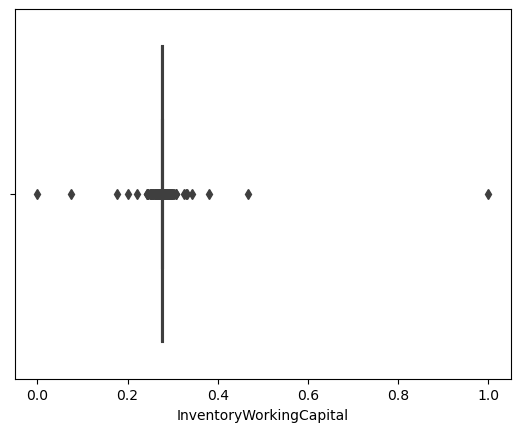

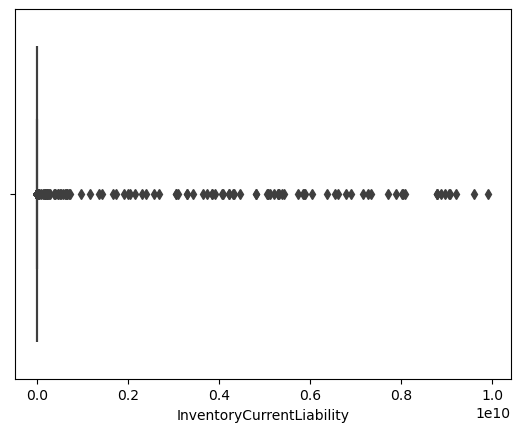

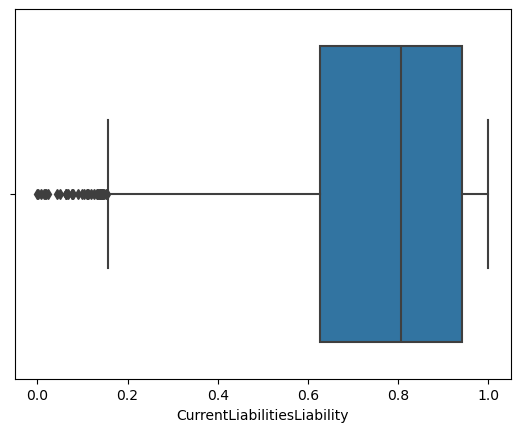

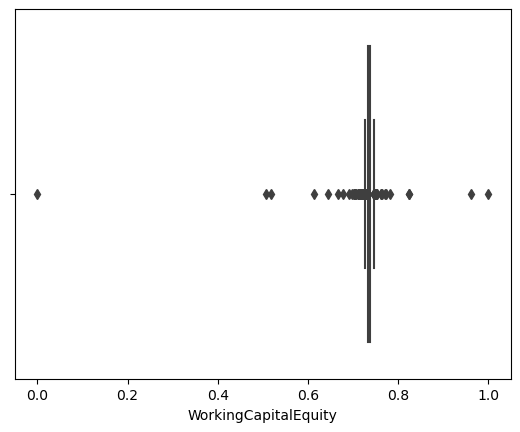

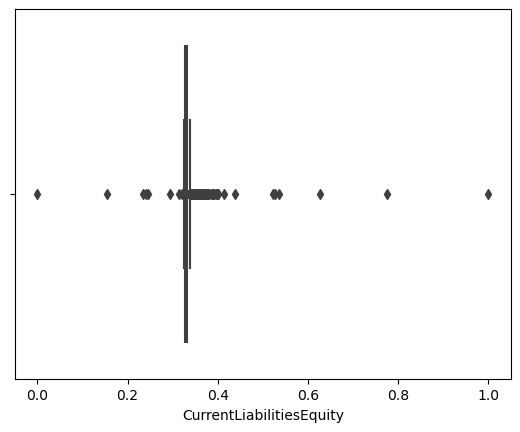

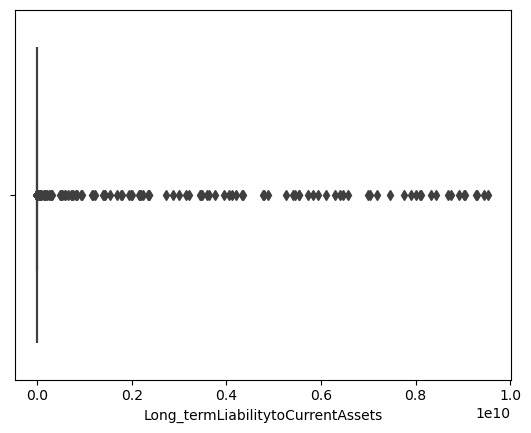

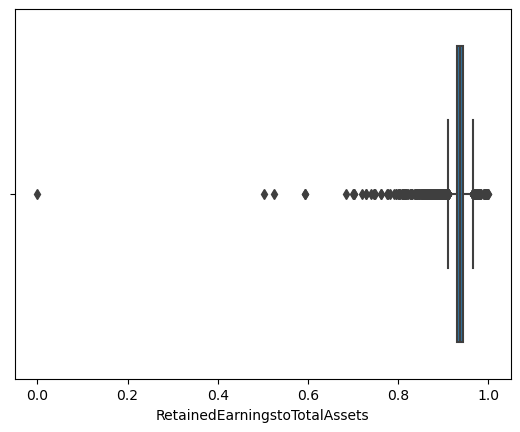

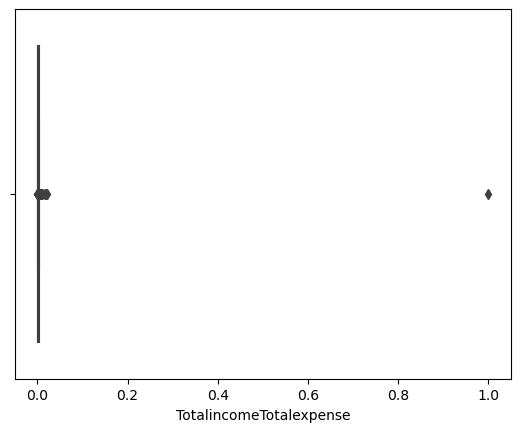

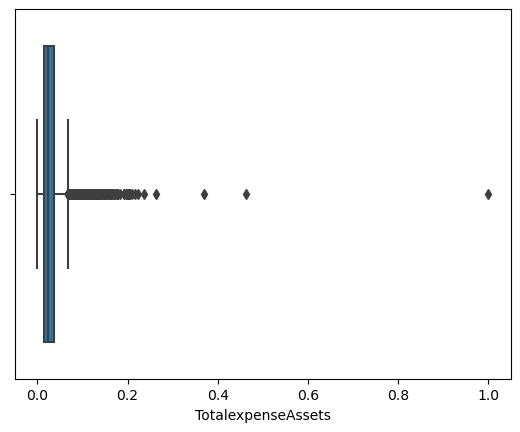

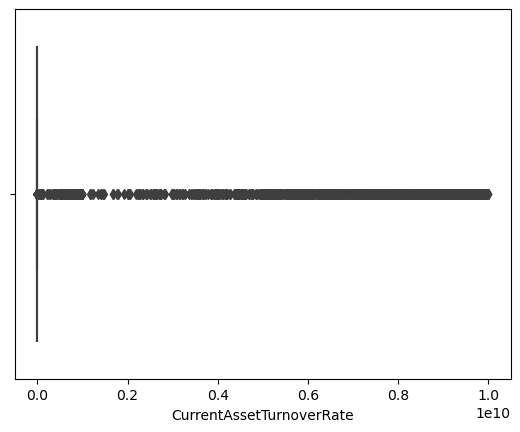

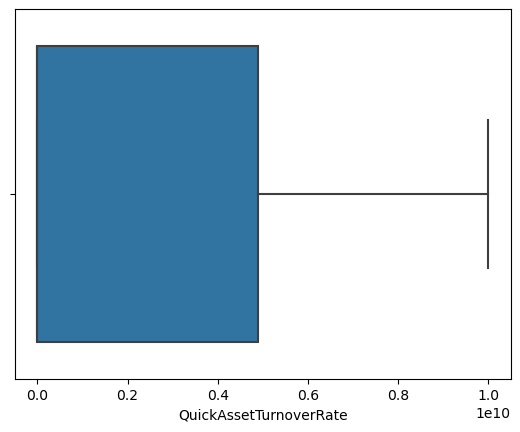

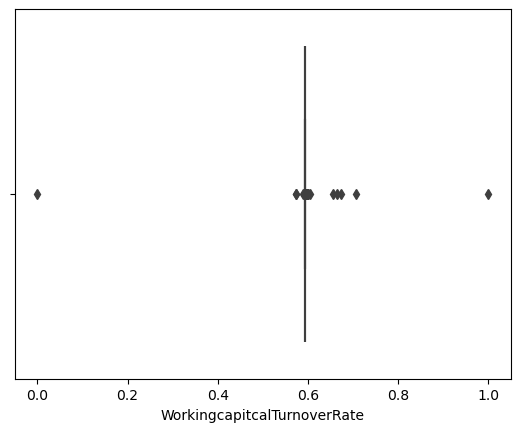

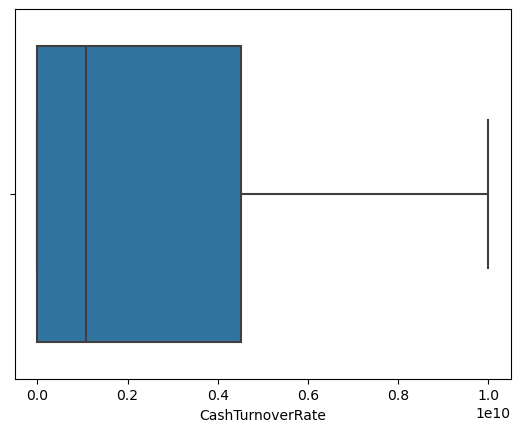

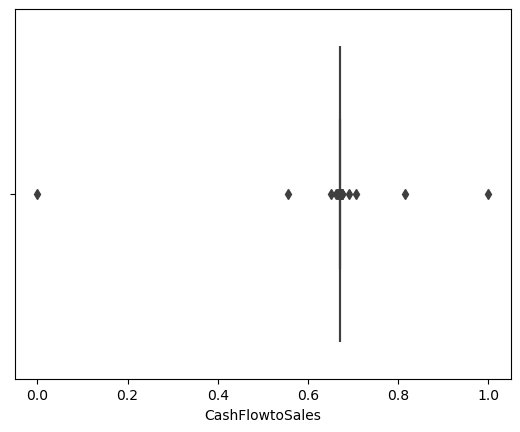

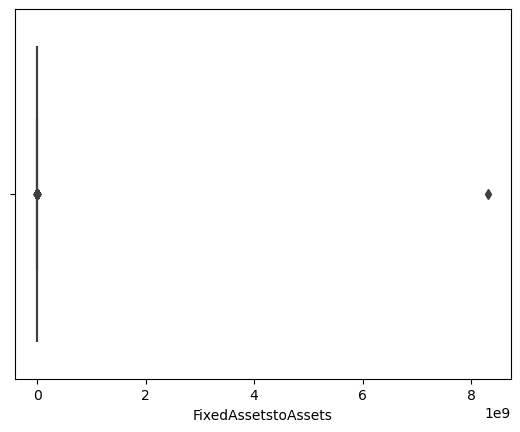

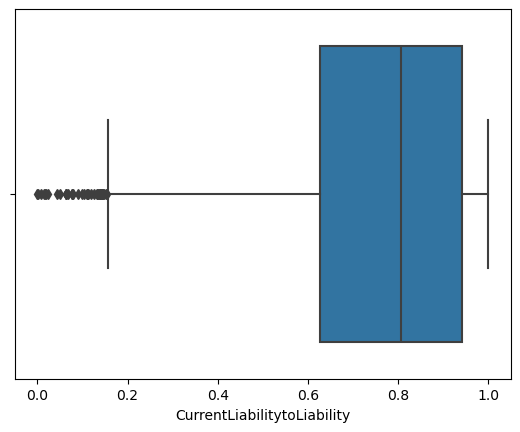

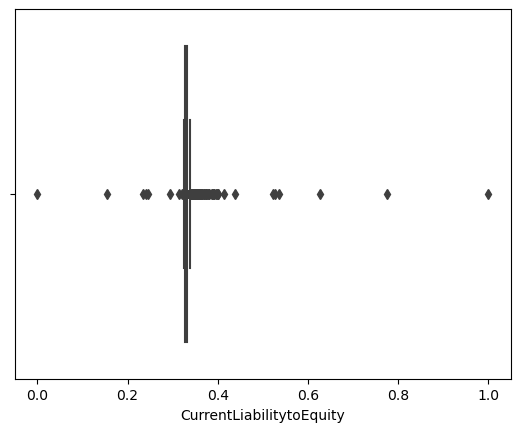

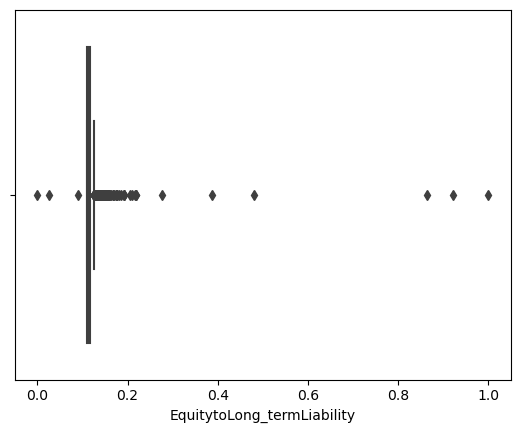

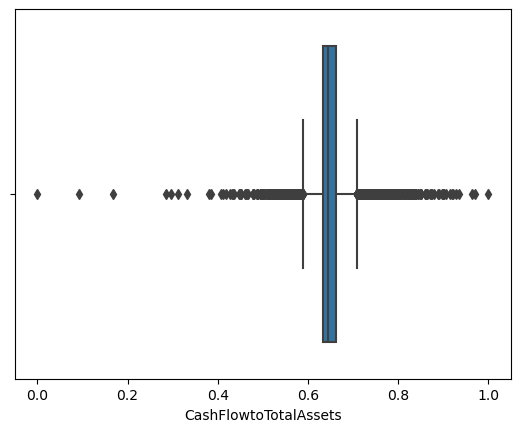

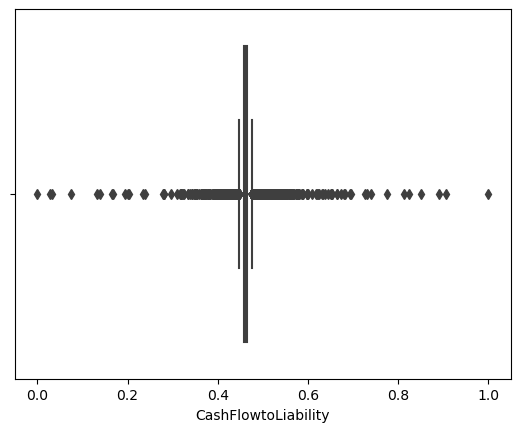

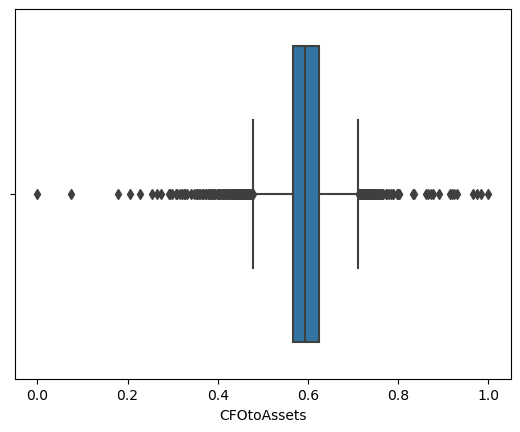

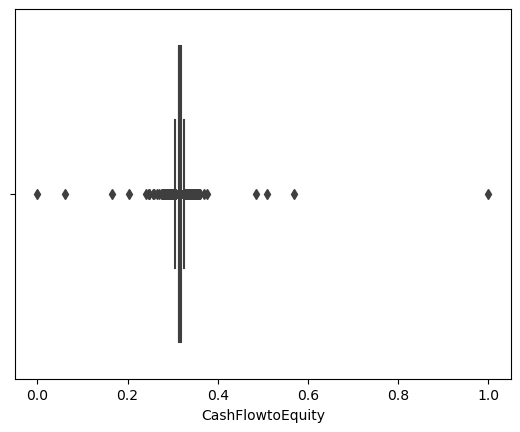

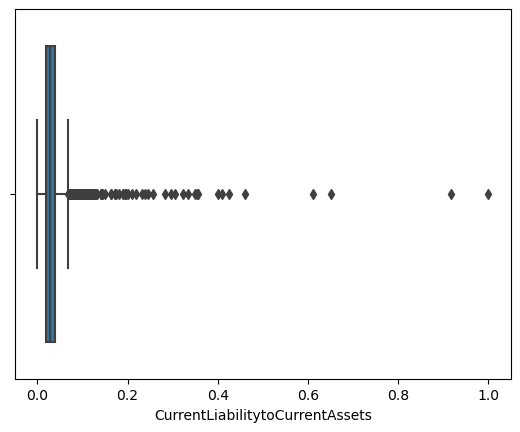

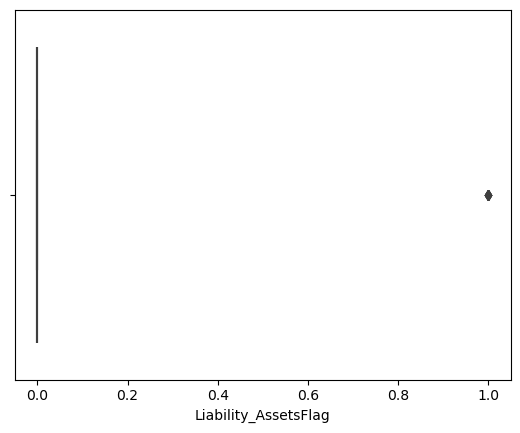

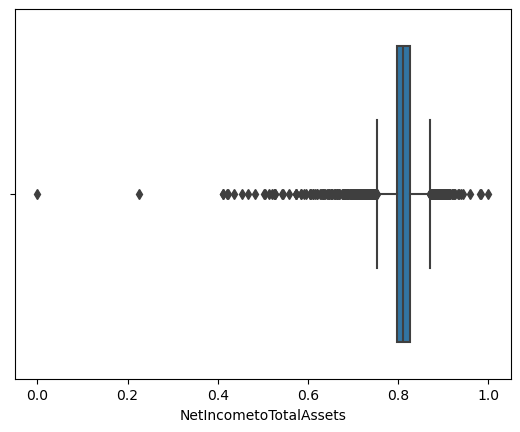

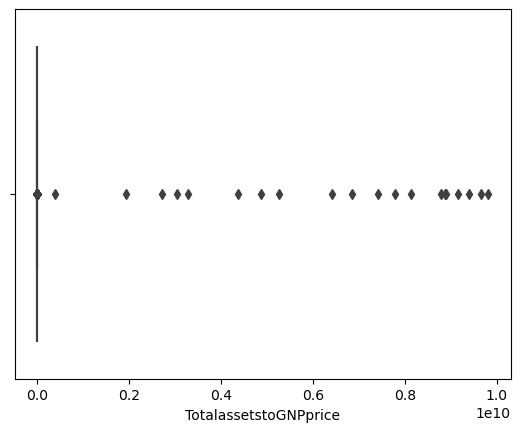

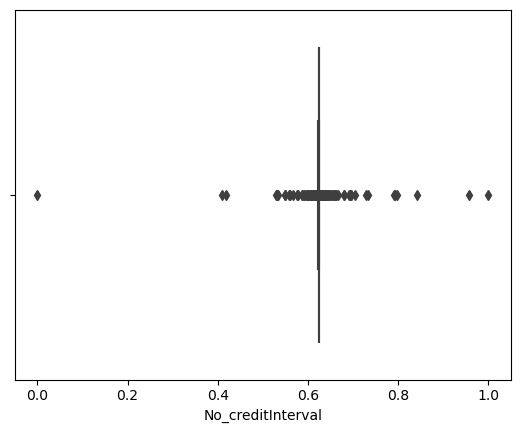

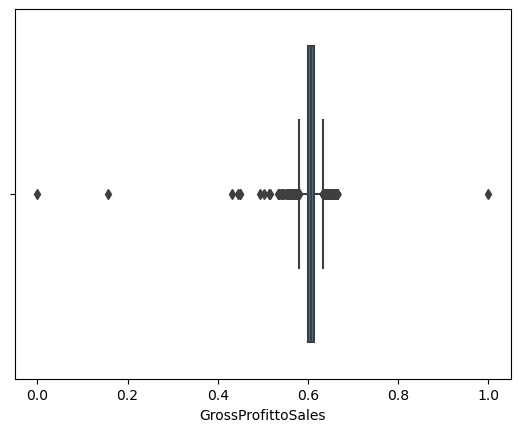

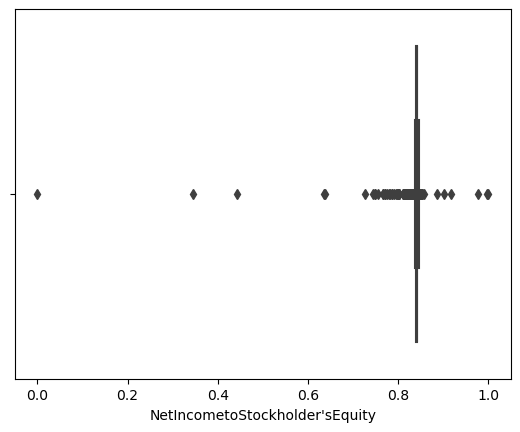

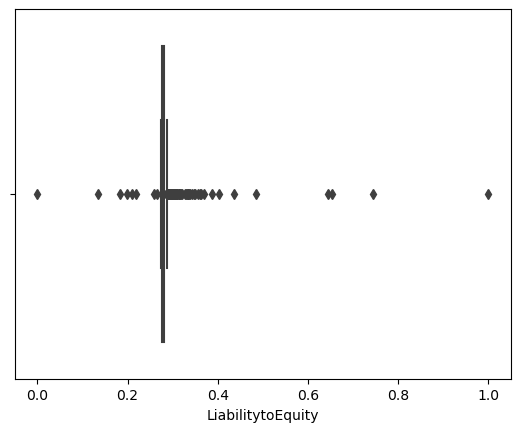

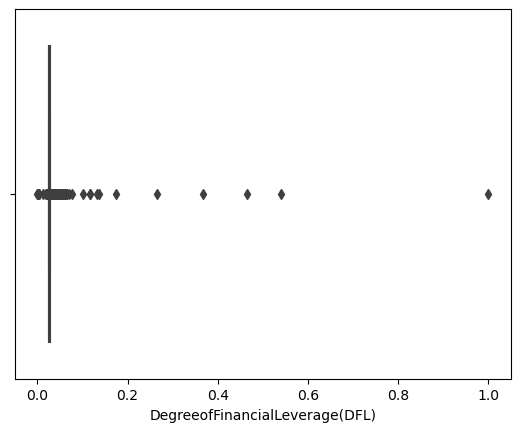

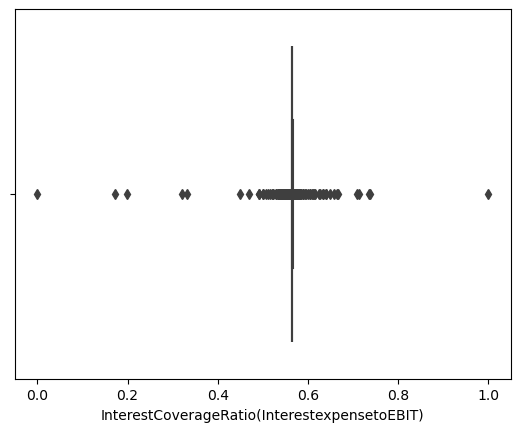

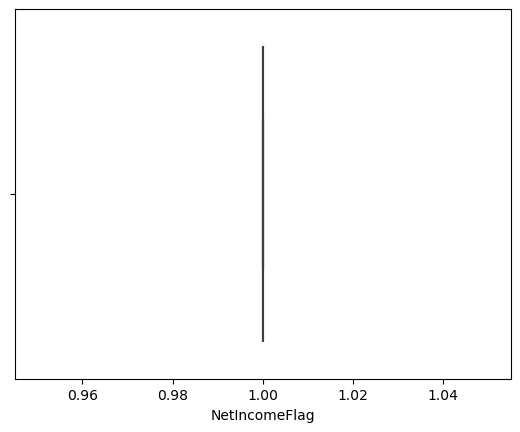

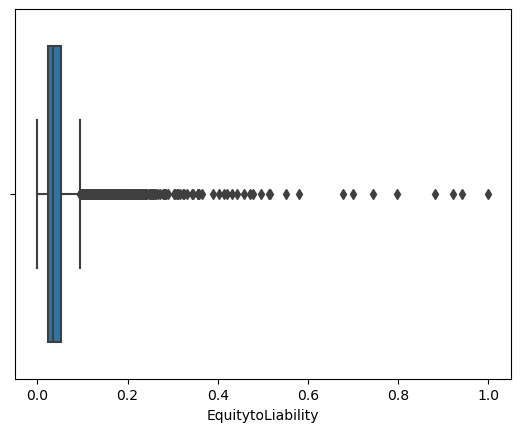

In [16]:
# Boxplot the columns whoes having outlier.
for col in df.columns:
    sns.boxplot(x=df[col])
    plt.show()

# Detect and handle outliers.

In [17]:
# Function to detect outliers using IQR for all columns
def detect_outliers_iqr(newdf):
    outliers = {}
    for column in newdf.columns:
        if newdf[column].dtype != 'object':  # Ensure the column is numerical
            Q1 = newdf[column].quantile(0.25)
            Q3 = newdf[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers[column] = newdf[(newdf[column] < lower_bound) | (newdf[column] > upper_bound)]
    return outliers

print("================================================================================")

# Detect outliers in all columns
outliers = detect_outliers_iqr(newdf)

# Print the number of outliers for each feature

count = 0

for feature, outlier_data in outliers.items():
    print(f'{feature}: {len(outlier_data)} outliers')
    if len(outlier_data) > 0:
        count+=1

# print("=============================================================================================")
    
# # Function to cap outliers for all columns using IQR
def cap_outliers(newdf):
    for column in newdf.columns:
        if newdf[column].dtype != 'object':  # Ensure the column is numerical
            Q1 = newdf[column].quantile(0.25)
            Q3 = newdf[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            idx=np.where(newdf[column]>upper_bound)
            newdf[column].iloc[idx]=upper_bound
            idx=np.where(newdf[column]<lower_bound)
            newdf[column].iloc[idx]=lower_bound
    return newdf

# Handle outliers in all columns
data_cleaned = cap_outliers(newdf)

# Verify the changes

print("----------------------------------------------------------------------------")

print("Outliers have been capped.")
data_cleaned.describe()

print("------------------------------------------------------------------------------")
print("Outlier Found In : ",count,"  Column")

ROA(C)beforeinterestanddepreciationbeforeinterest: 391 outliers
ROA(A)beforeinterestandaftertax: 561 outliers
ROA(B)beforeinterestanddepreciationaftertax: 432 outliers
OperatingGrossMargin: 320 outliers
RealizedSalesGrossMargin: 318 outliers
OperatingProfitRate: 716 outliers
Pre_taxnetInterestRate: 773 outliers
After_taxnetInterestRate: 867 outliers
Non_industryincomeandexpenditurerevenue: 1094 outliers
Continuousinterestrate(aftertax): 806 outliers
OperatingExpenseRate: 0 outliers
Researchanddevelopmentexpenserate: 182 outliers
Cashflowrate: 576 outliers
Interest_bearingdebtinterestrate: 396 outliers
Taxrate(A): 120 outliers
NetValuePerShare(B): 457 outliers
NetValuePerShare(A): 464 outliers
NetValuePerShare(C): 465 outliers
PersistentEPSintheLastFourSeasons: 508 outliers
CashFlowPerShare: 532 outliers
RevenuePerShare(Yuan¥): 478 outliers
OperatingProfitPerShare(Yuan¥): 442 outliers
PerShareNetprofitbeforetax(Yuan¥): 511 outliers
RealizedSalesGrossProfitGrowthRate: 814 outliers
Operat

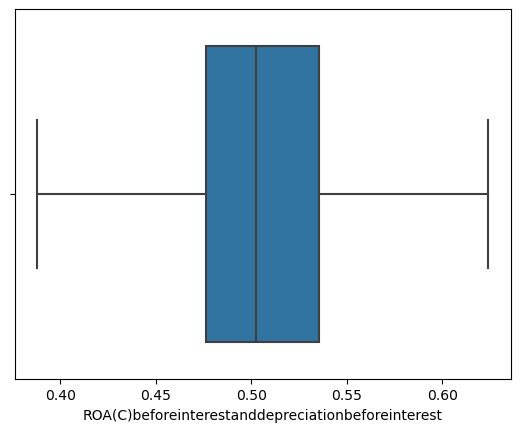

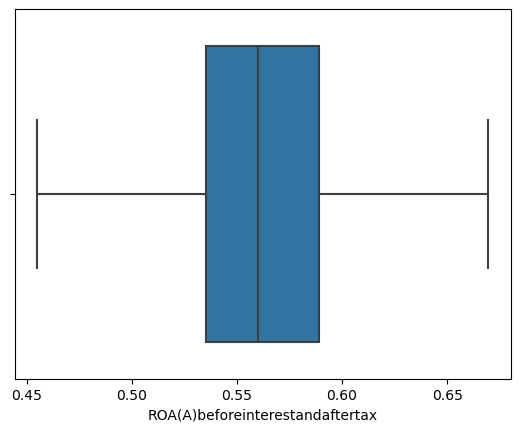

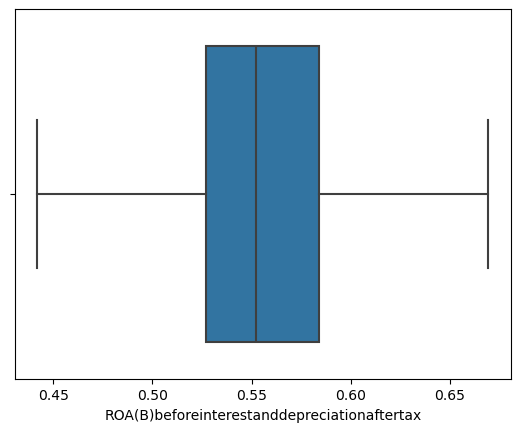

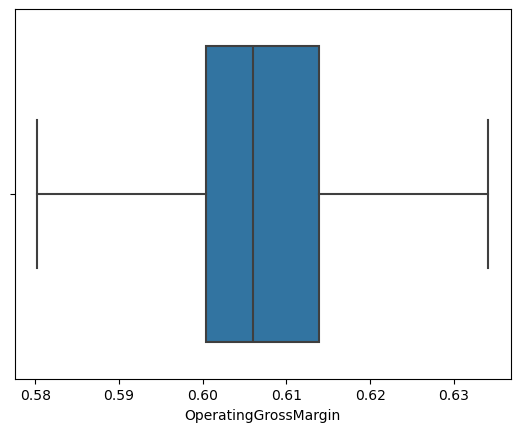

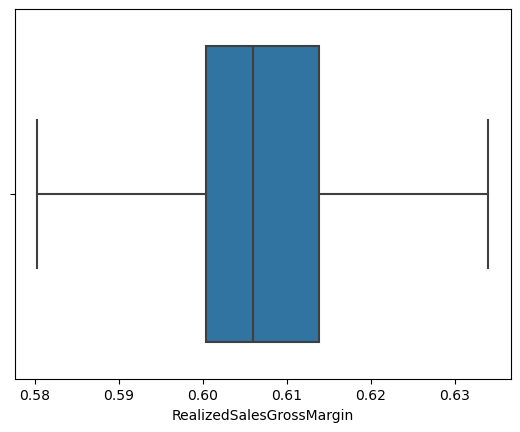

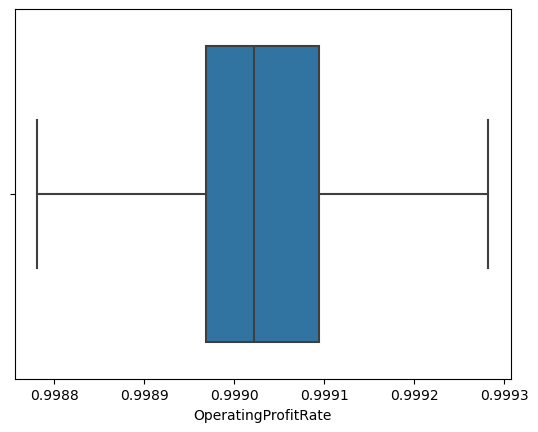

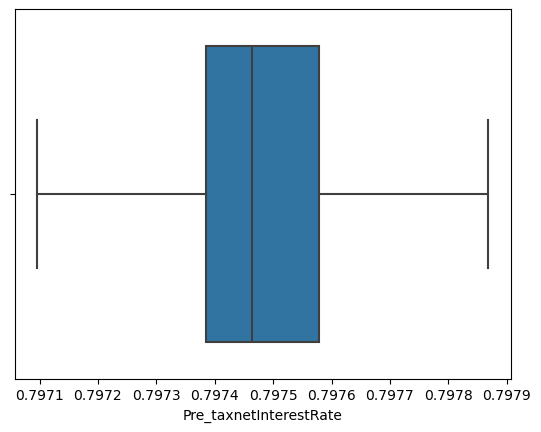

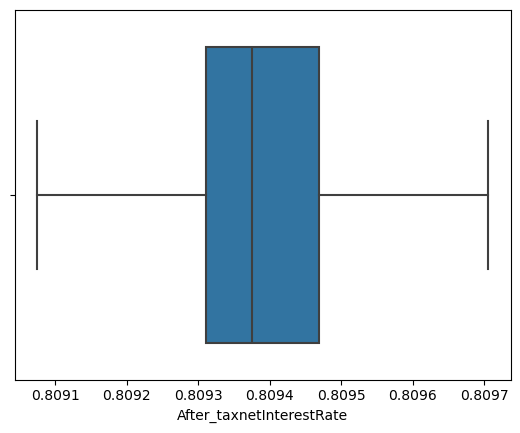

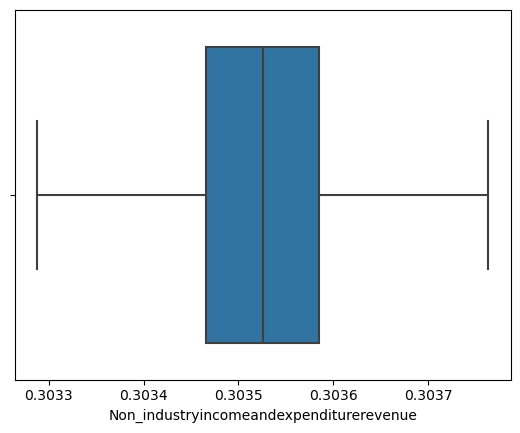

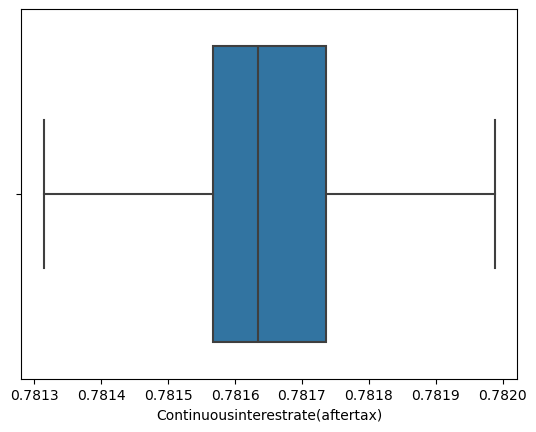

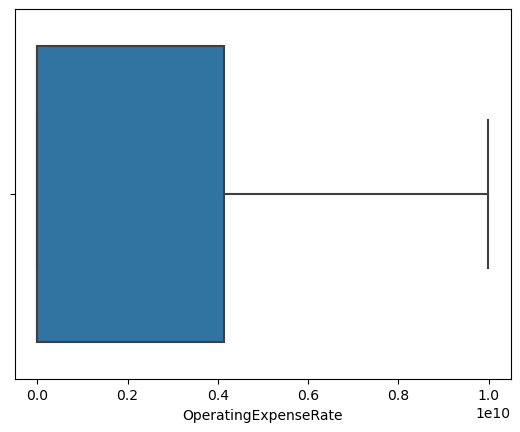

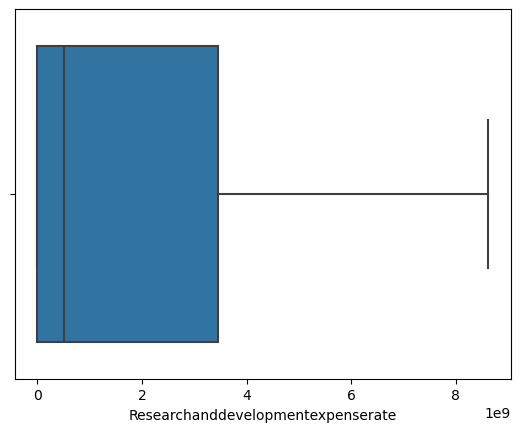

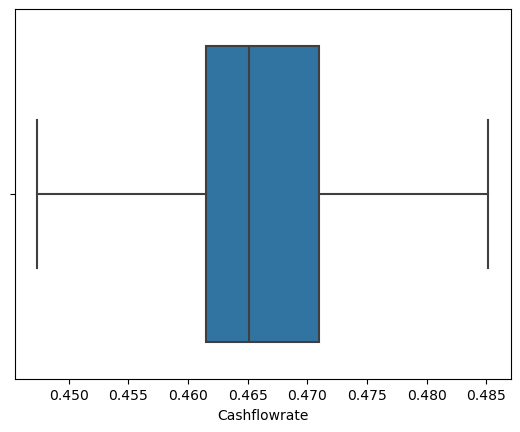

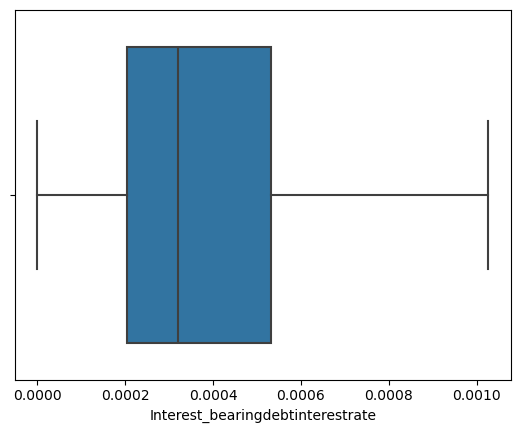

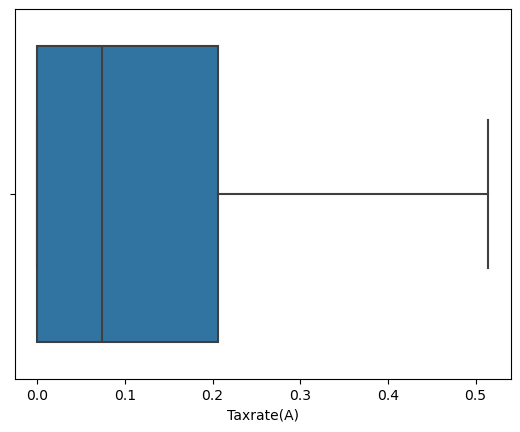

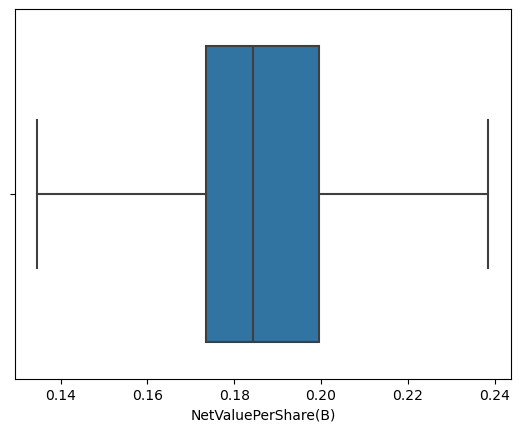

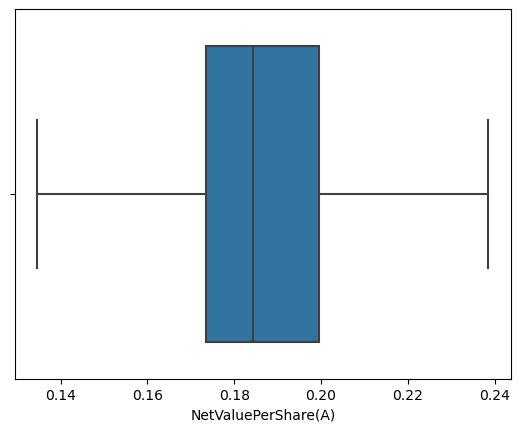

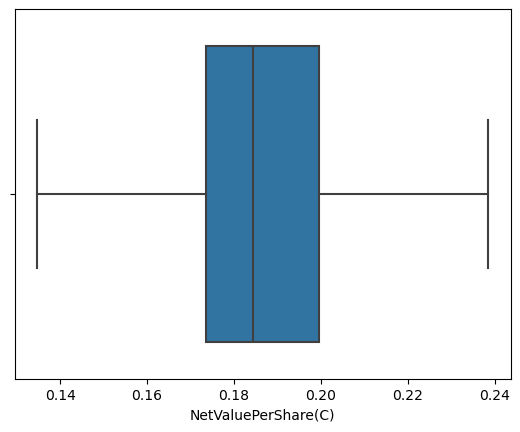

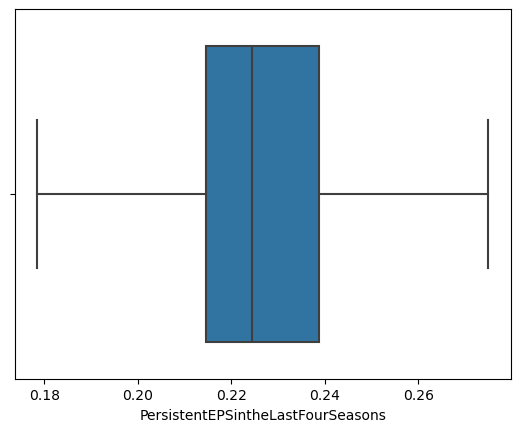

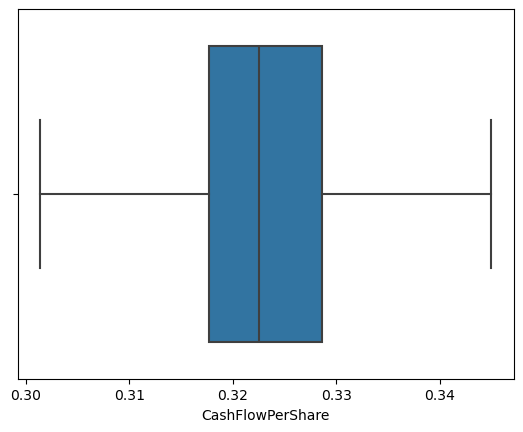

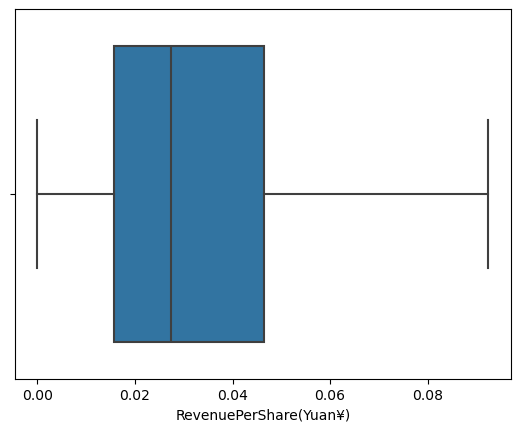

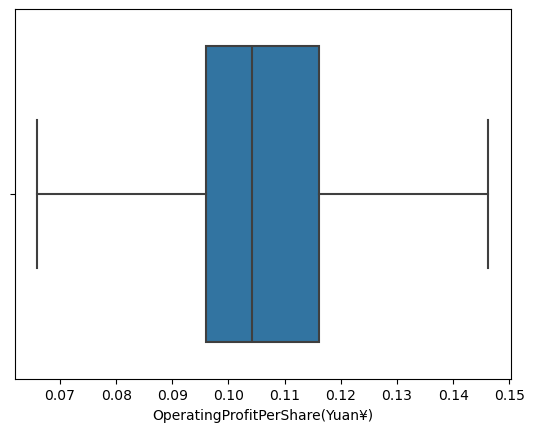

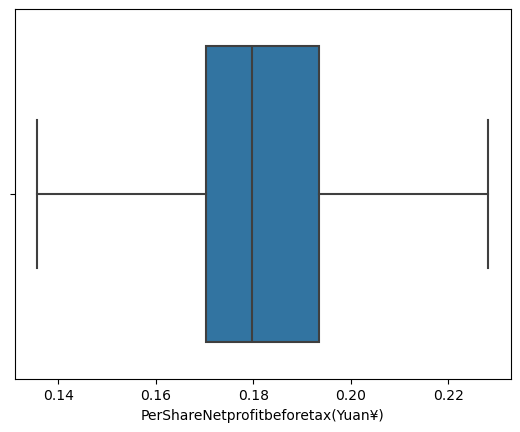

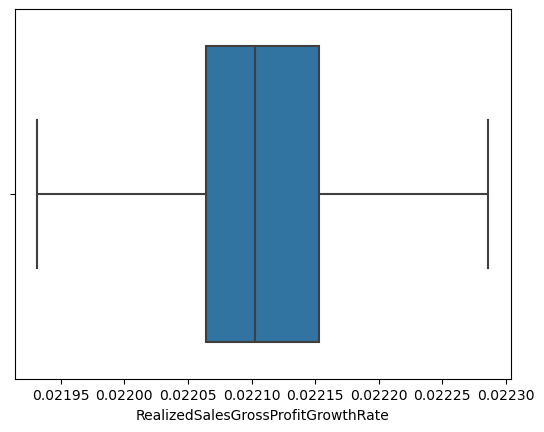

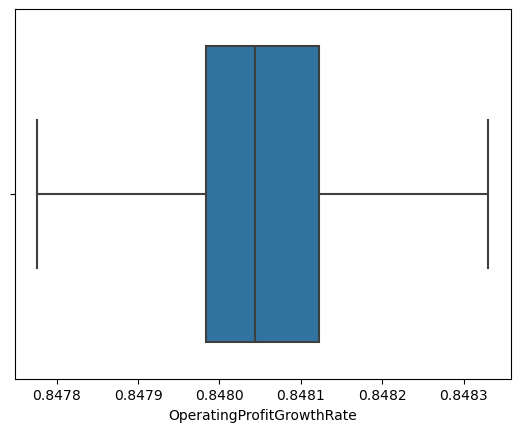

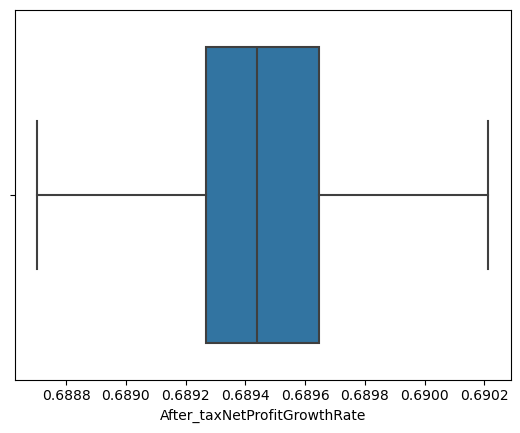

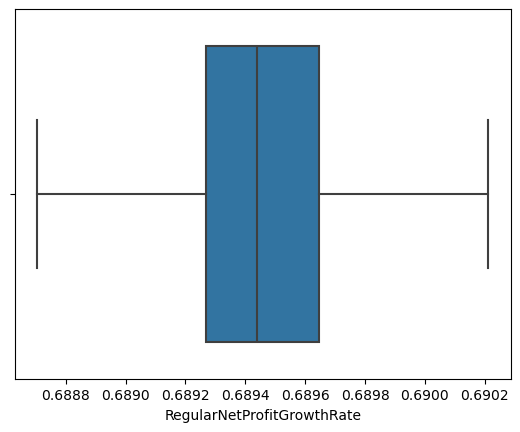

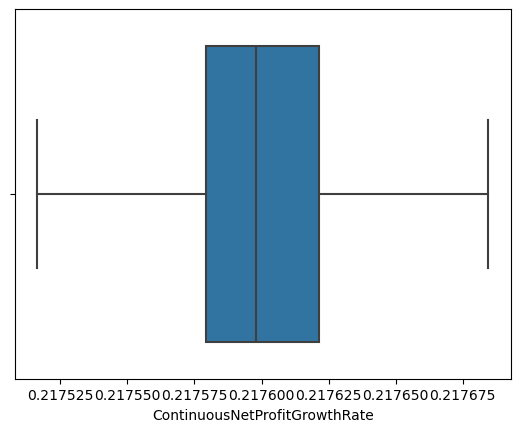

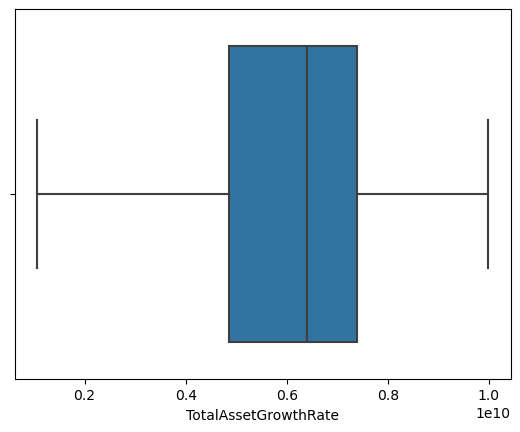

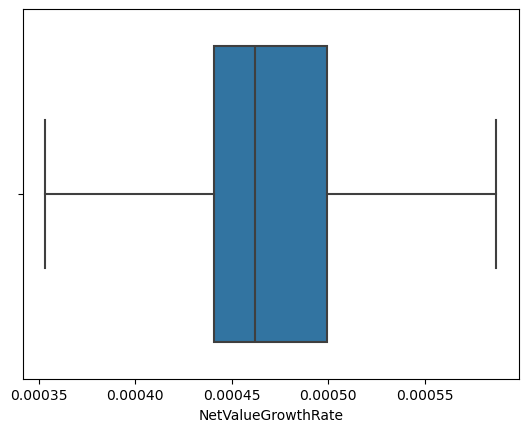

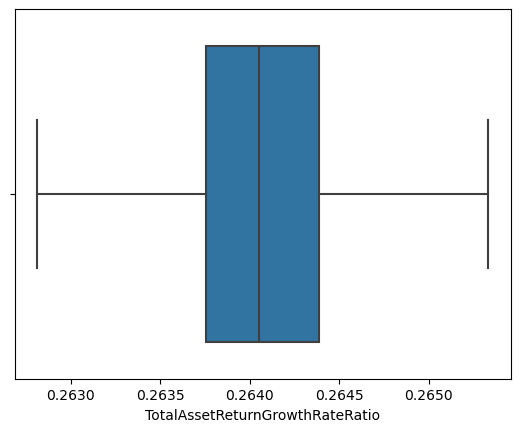

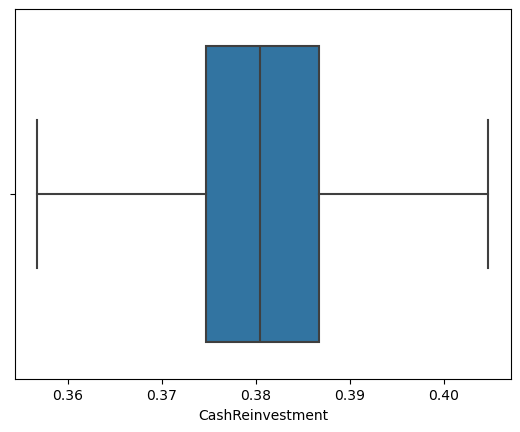

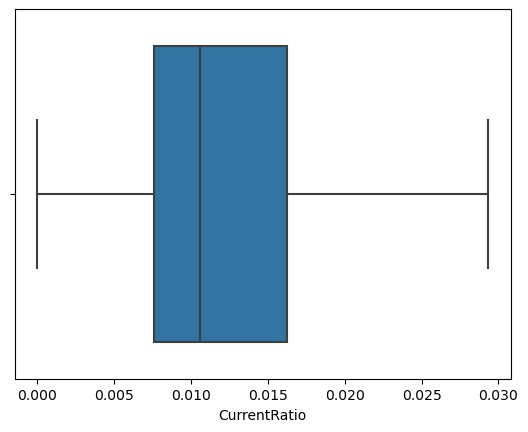

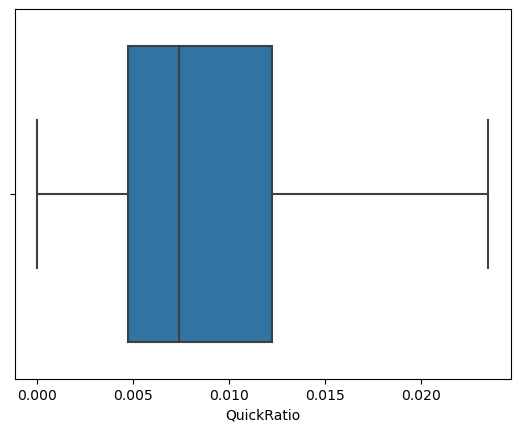

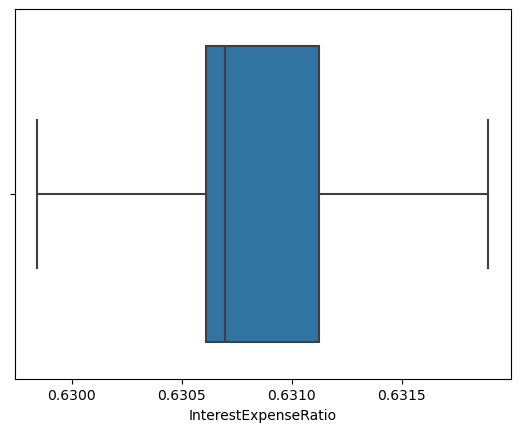

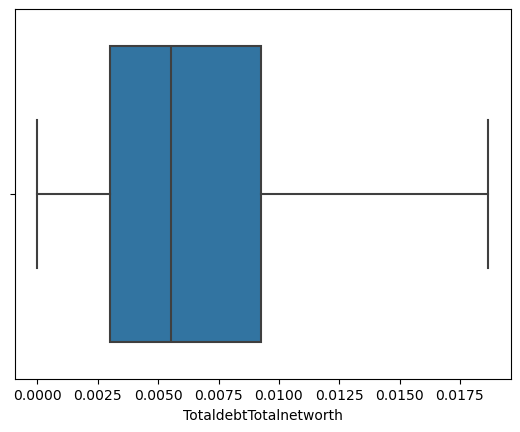

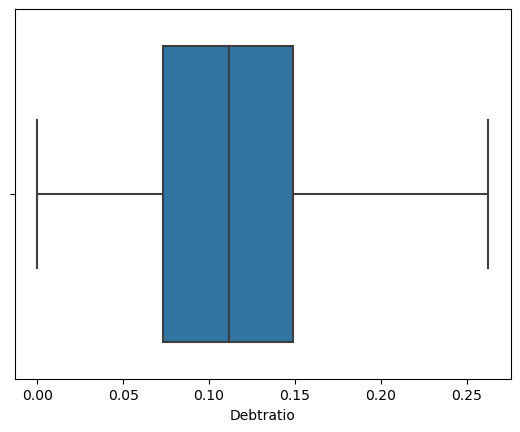

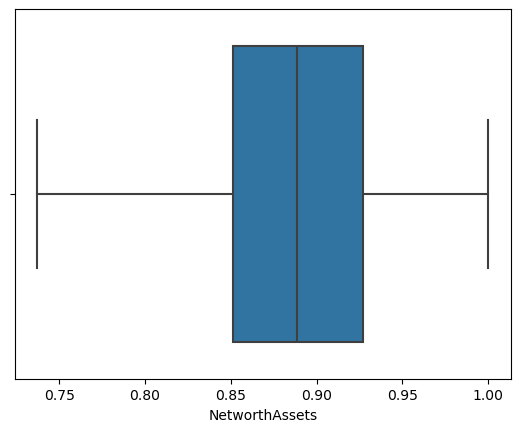

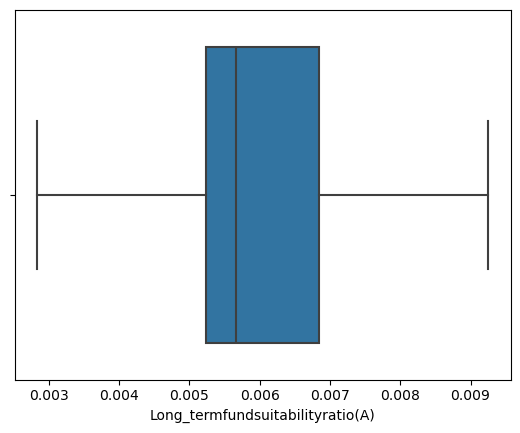

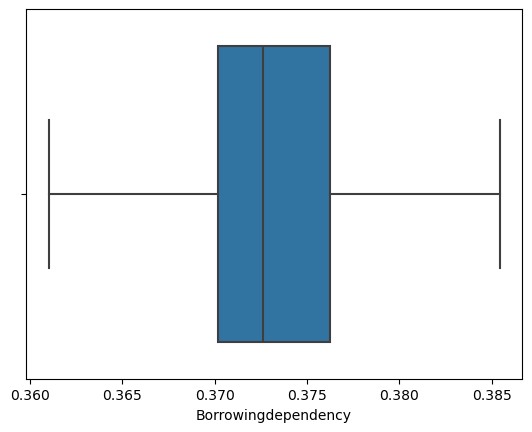

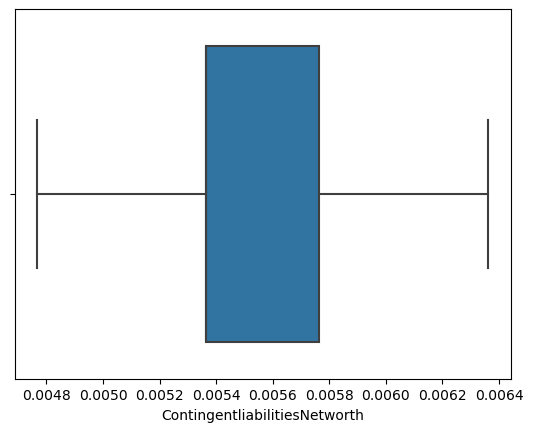

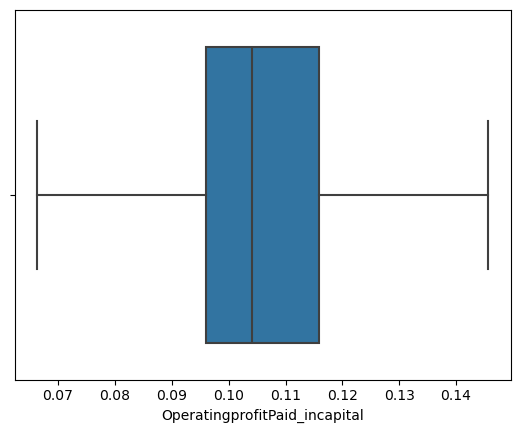

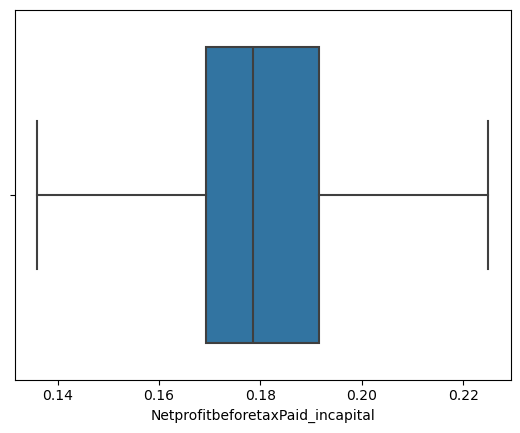

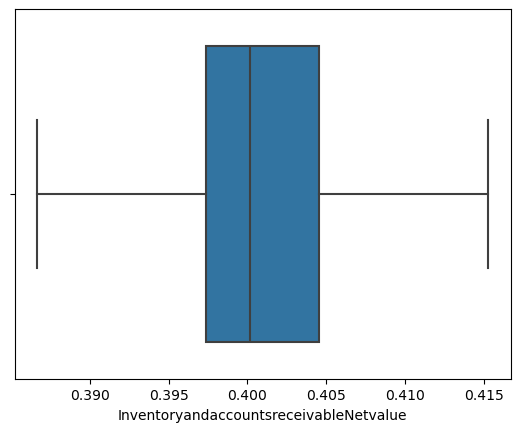

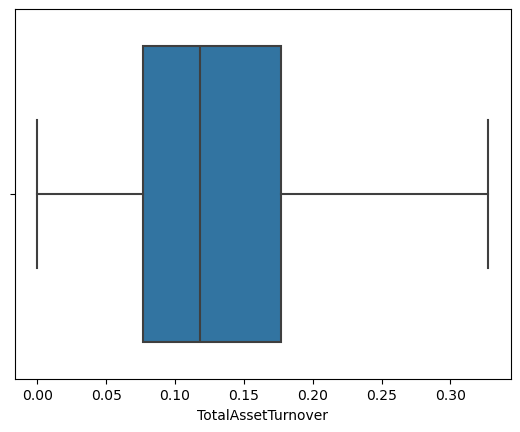

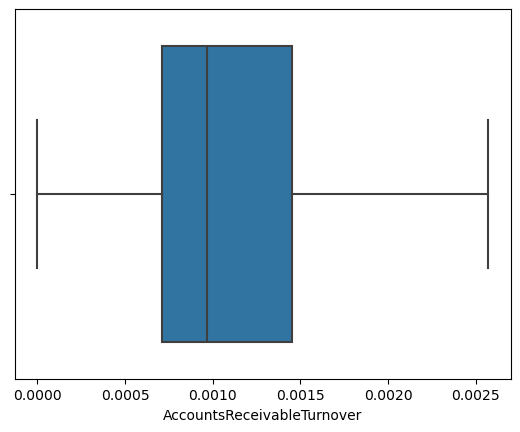

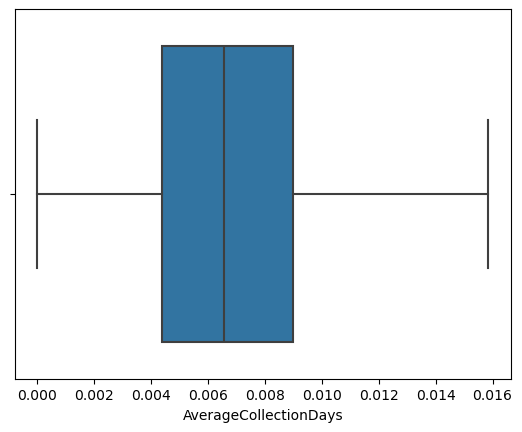

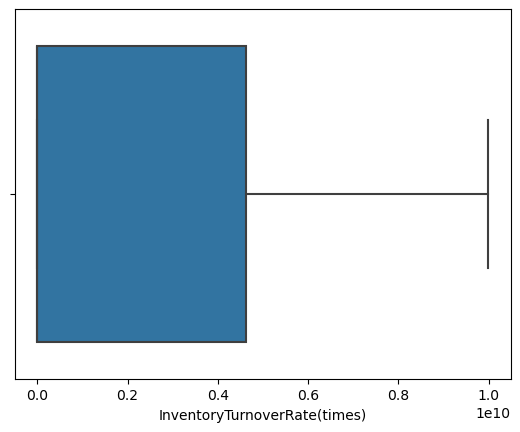

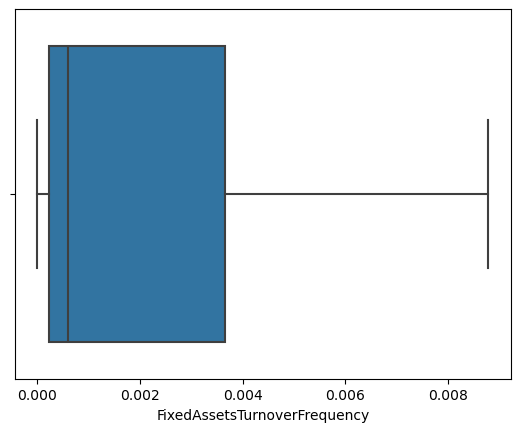

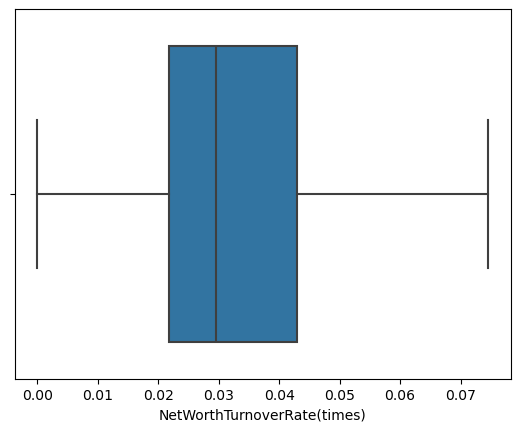

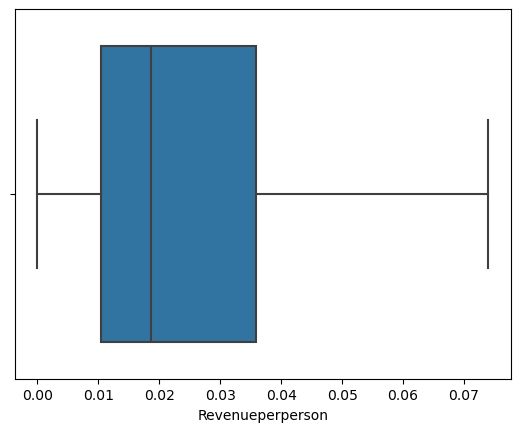

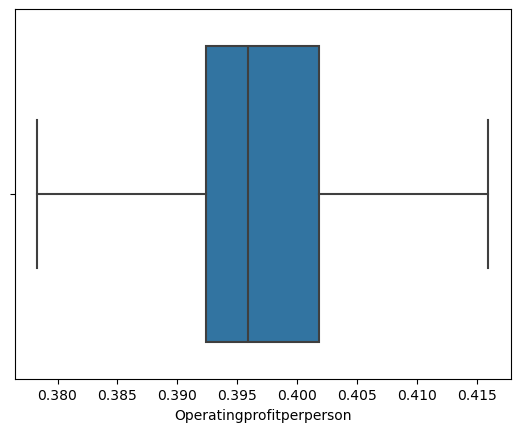

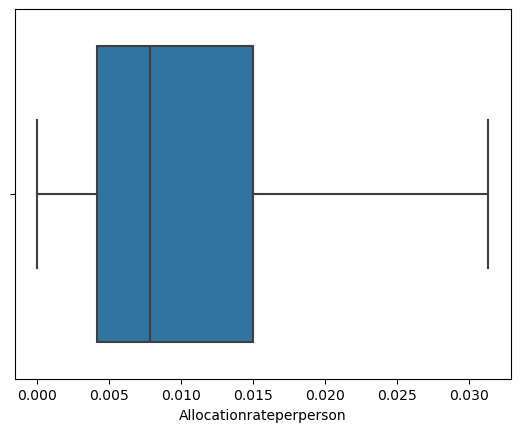

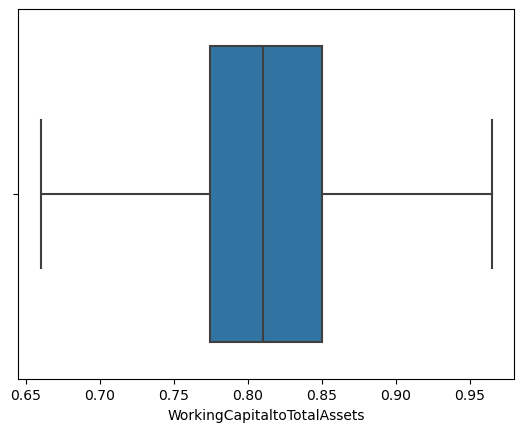

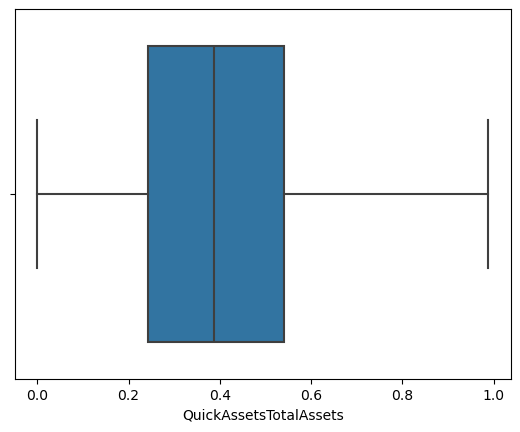

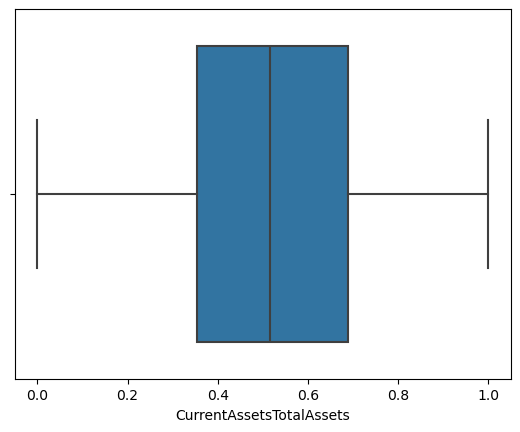

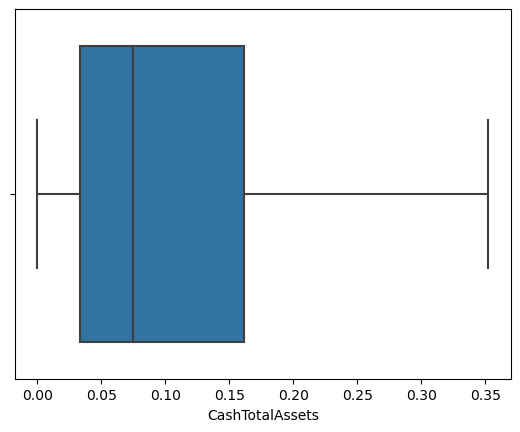

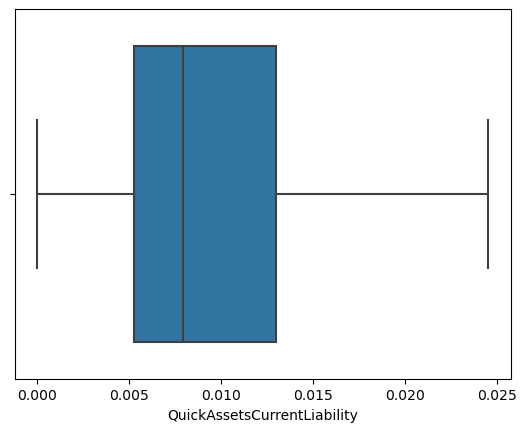

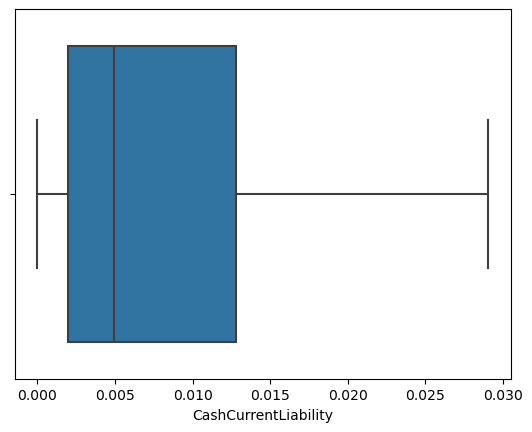

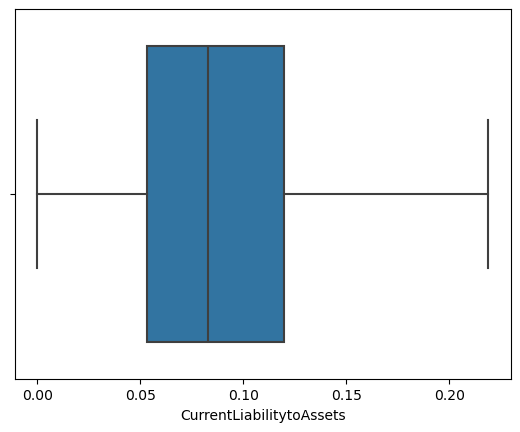

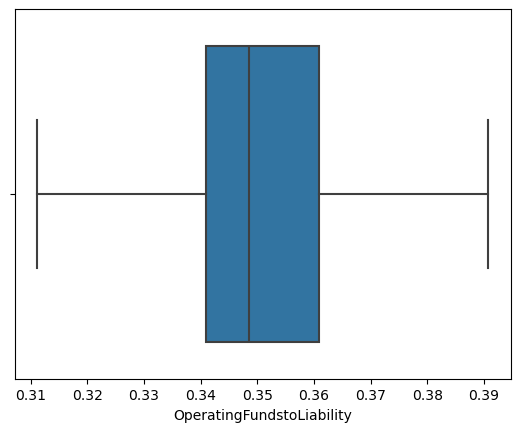

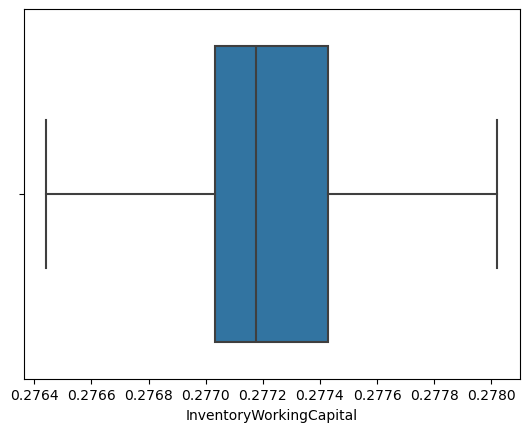

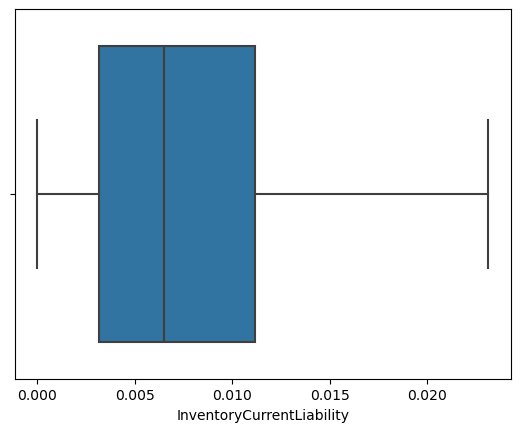

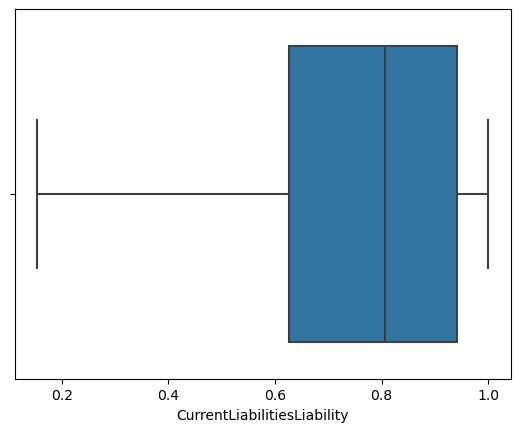

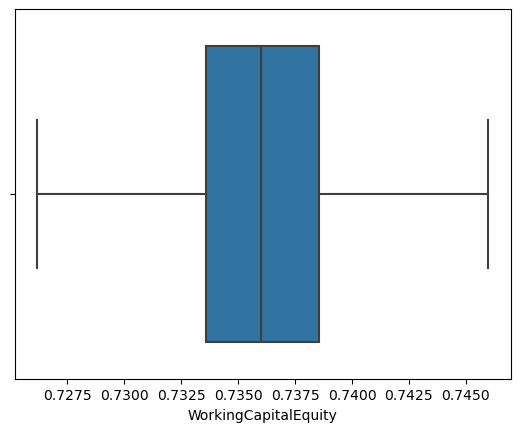

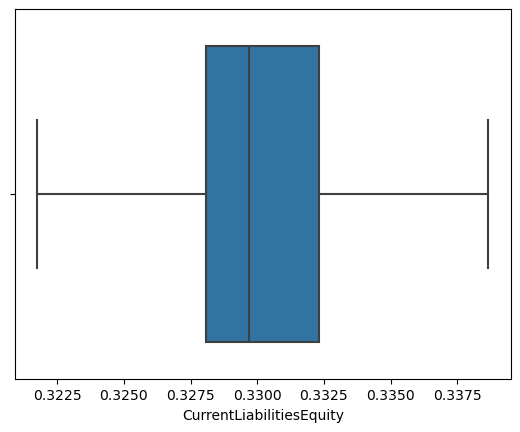

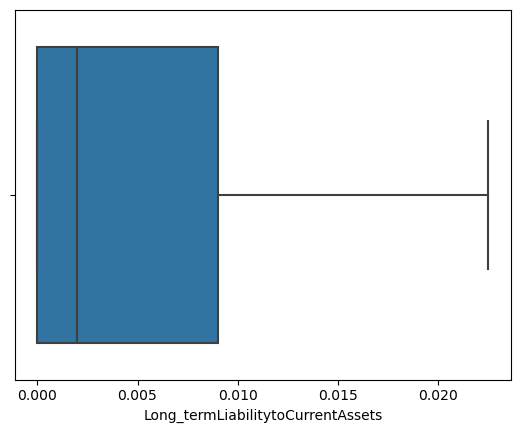

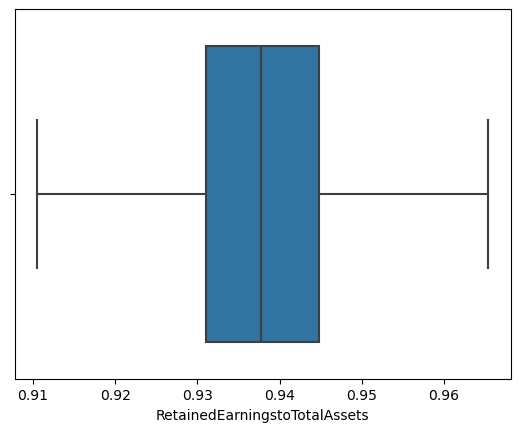

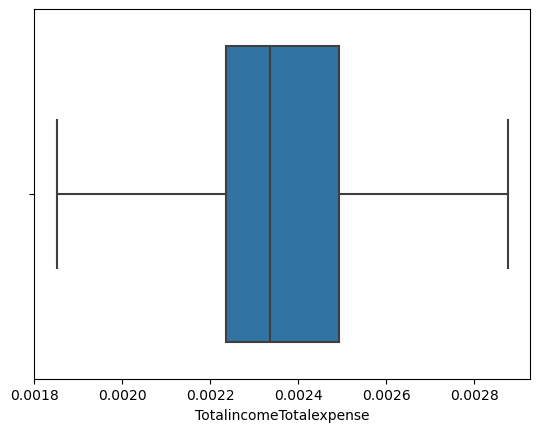

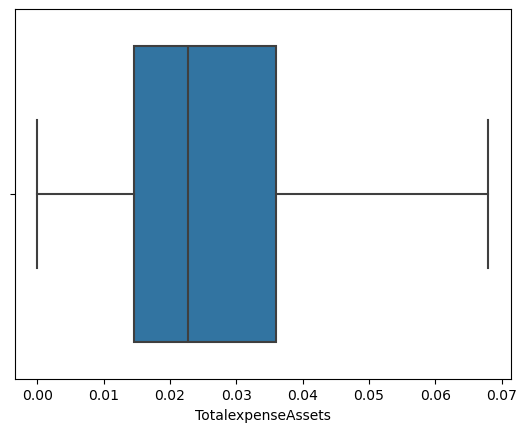

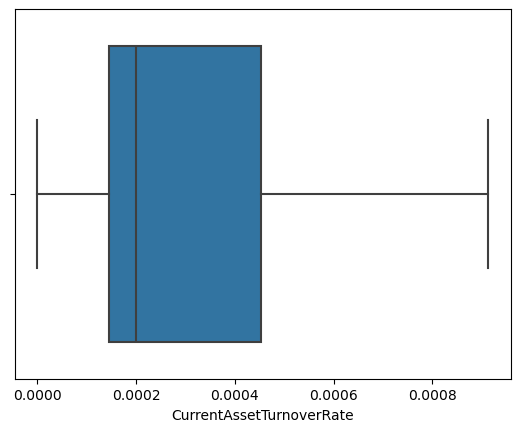

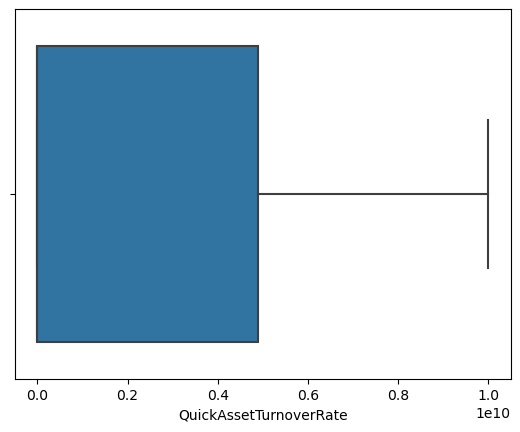

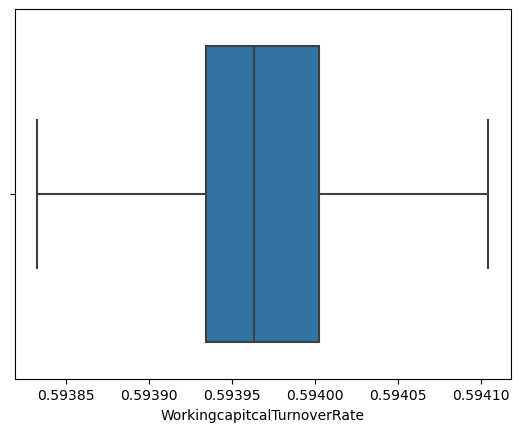

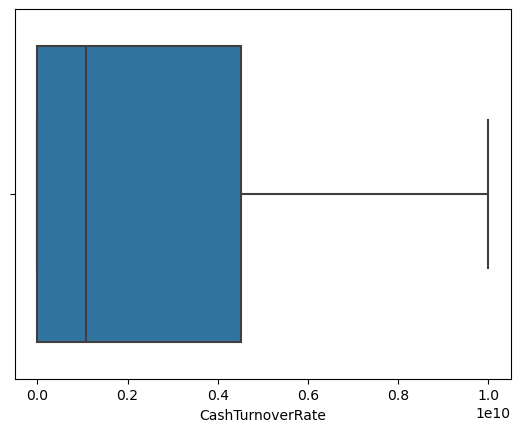

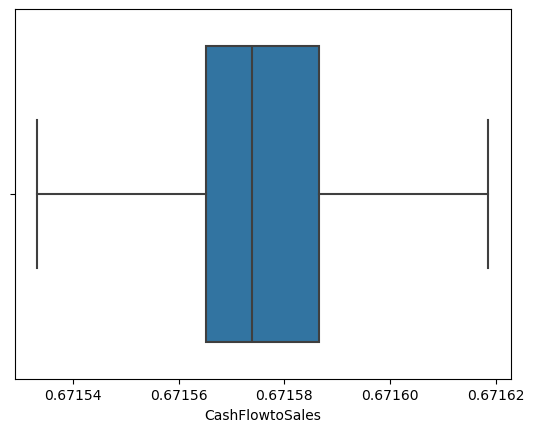

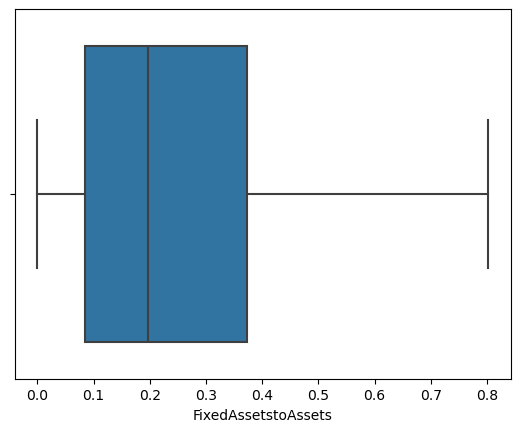

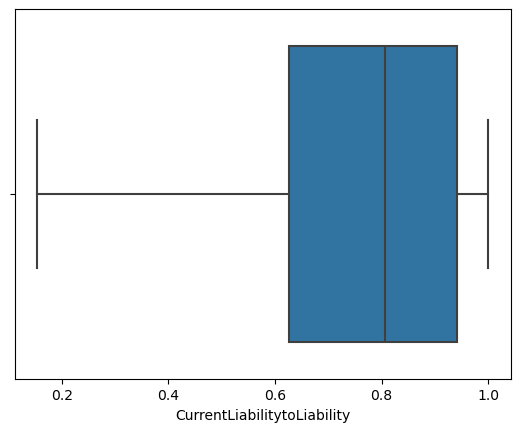

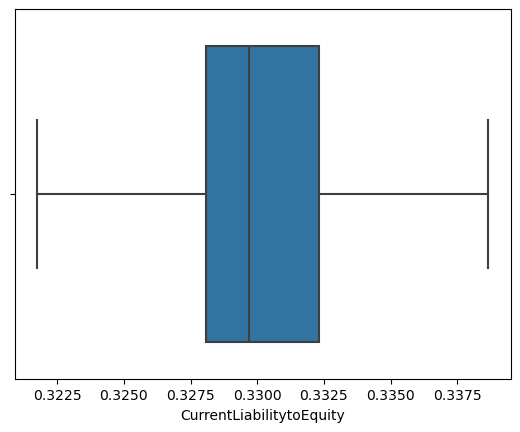

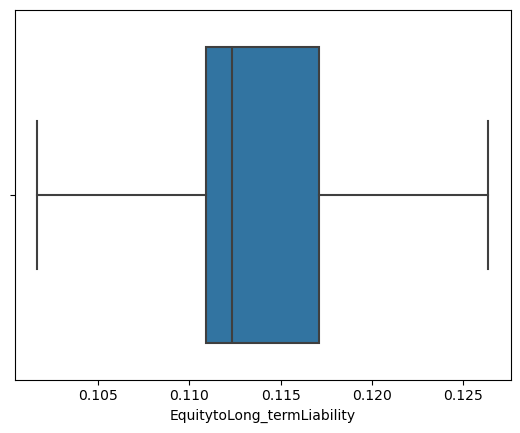

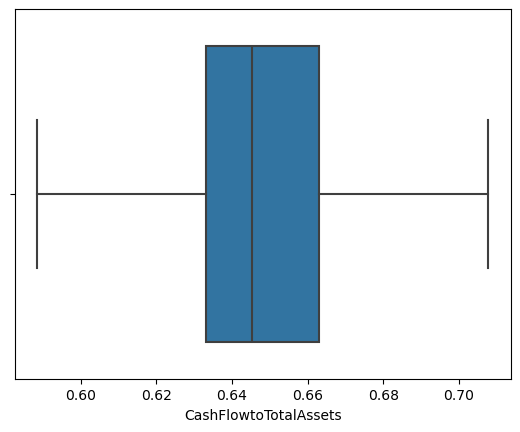

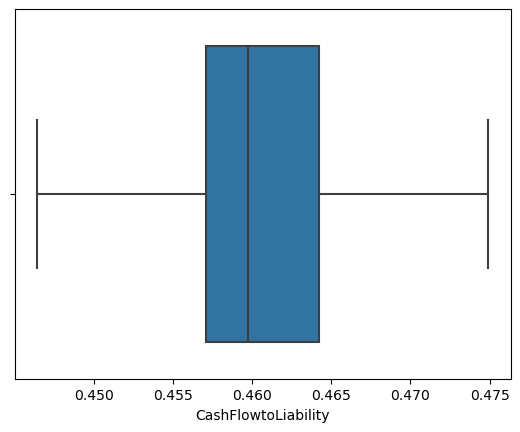

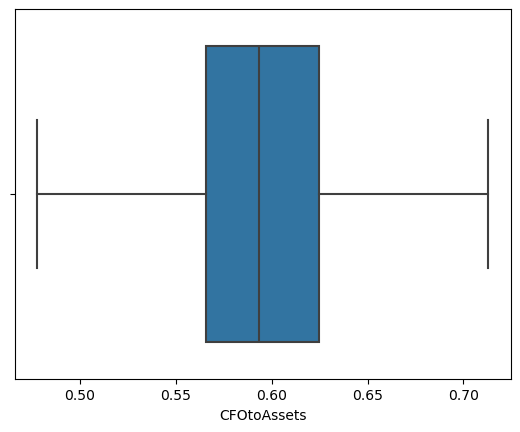

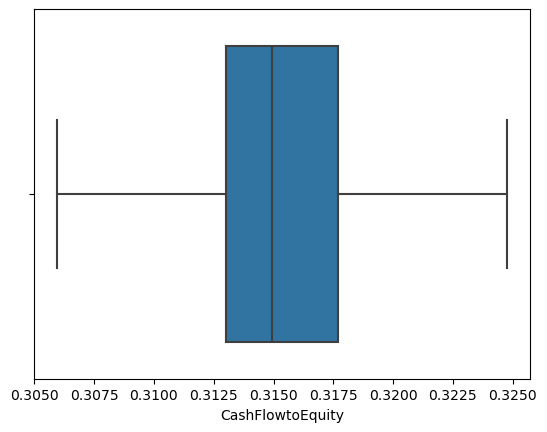

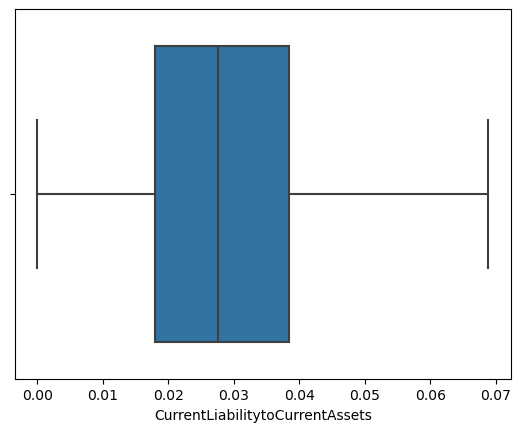

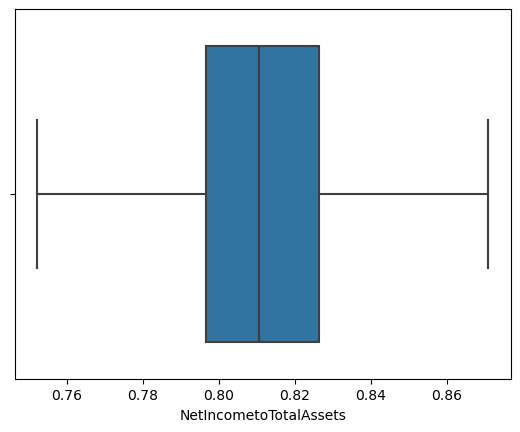

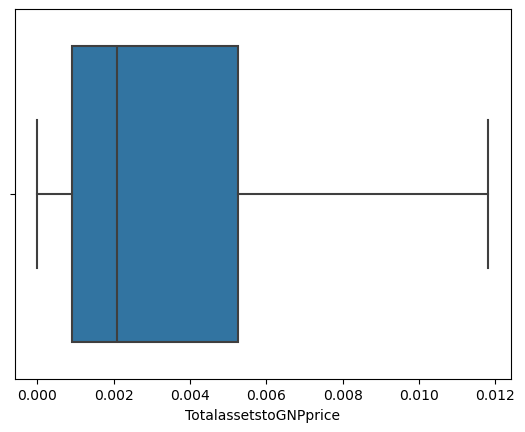

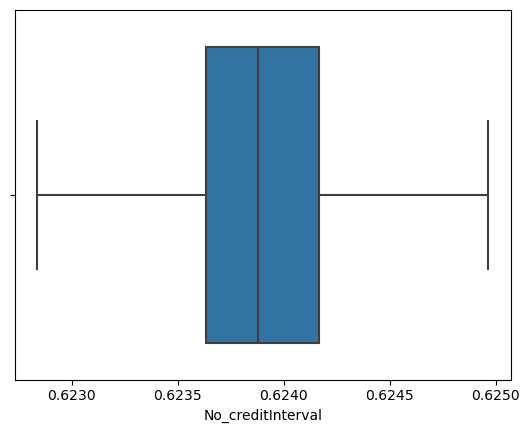

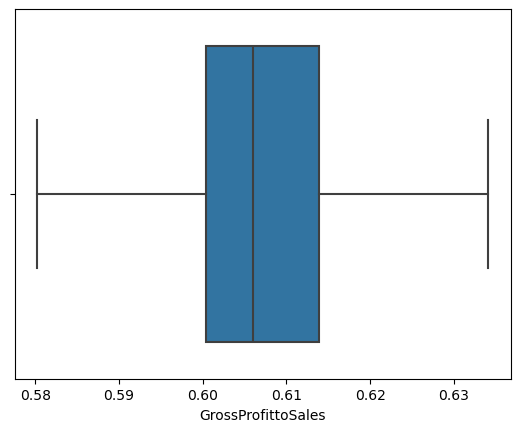

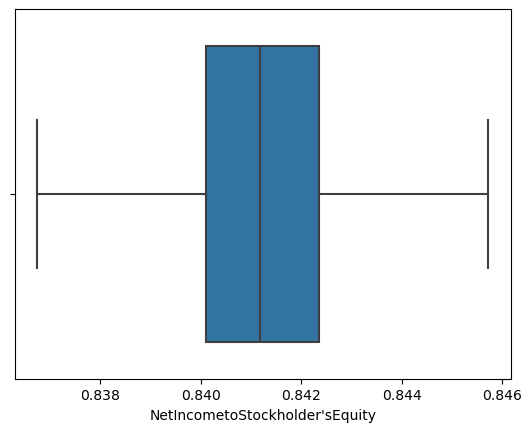

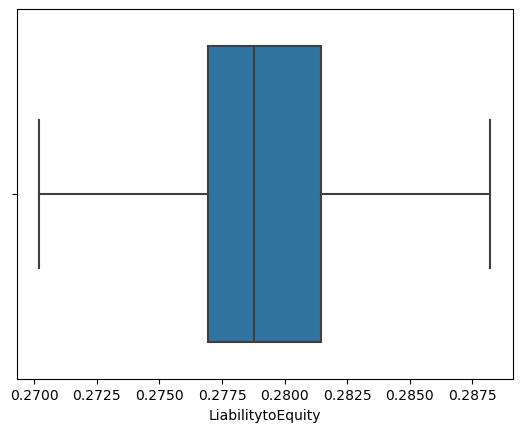

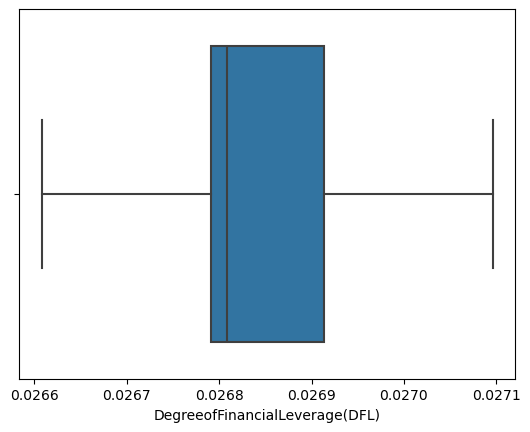

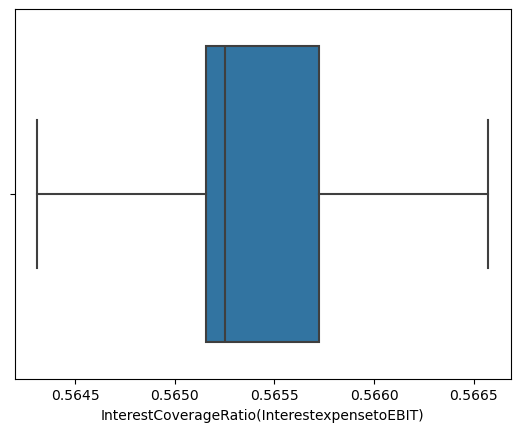

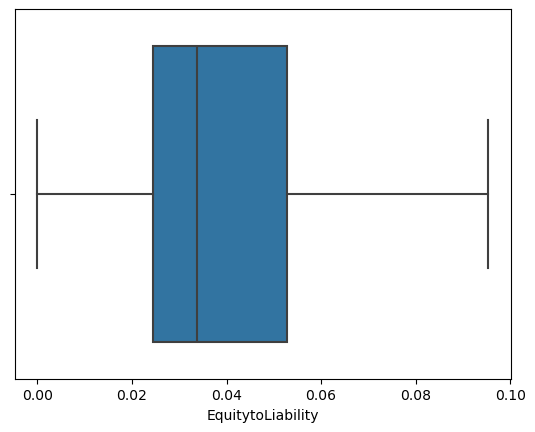

In [18]:
plot_count=0
for col in newdf.columns:
    sns.boxplot(x=newdf[col])
    plt.show()
    plot_count+=1
# Boxplot the columns whoes outlier are removed.

# Exploratory Data Analysis (EDA):

In [19]:
df.describe()

Bankrupt  ROA(C)beforeinterestanddepreciationbeforeinterest  \
count  6819.000000                                        6819.000000   
mean      0.032263                                           0.505180   
std       0.176710                                           0.060686   
min       0.000000                                           0.000000   
25%       0.000000                                           0.476527   
50%       0.000000                                           0.502706   
75%       0.000000                                           0.535563   
max       1.000000                                           1.000000   

       ROA(A)beforeinterestandaftertax  \
count                      6819.000000   
mean                          0.558625   
std                           0.065620   
min                           0.000000   
25%                           0.535543   
50%                           0.559802   
75%                           0.589157   
max                           1.000000   

       ROA(B)beforeinterestanddepreciationaftertax  OperatingGrossMargin  \
count                                  6819.000000           6819.000000   
mean                                      0.553589              0.607948   
std                                       0.061595              0.016934   
min                                       0.000000              0.000000   
25%                                       0.527277              0.600445   
50%                                       0.552278              0.605997   
75%                                       0.584105              0.613914   
max                                       1.000000              1.000000   

       RealizedSalesGrossMargin  OperatingProfitRate  Pre_taxnetInterestRate  \
count               6819.000000          6819.000000             6819.000000   
mean                   0.607929             0.998755                0.797190   
std                    0.016916             0.013010                0.012869   
min                    0.000000             0.000000                0.000000   
25%                    0.600434             0.998969                0.797386   
50%                    0.605976             0.999022                0.797464   
75%                    0.613842             0.999095                0.797579   
max                    1.000000             1.000000                1.000000   

       After_taxnetInterestRate  Non_industryincomeandexpenditurerevenue  \
count               6819.000000                              6819.000000   
mean                   0.809084                                 0.303623   
std                    0.013601                                 0.011163   
min                    0.000000                                 0.000000   
25%                    0.809312                                 0.303466   
50%                    0.809375                                 0.303525   
75%                    0.809469                                 0.303585   
max                    1.000000                                 1.000000   

       Continuousinterestrate(aftertax)  OperatingExpenseRate  \
count                       6819.000000          6.819000e+03   
mean                           0.781381          1.995347e+09   
std                            0.012679          3.237684e+09   
min                            0.000000          0.000000e+00   
25%                            0.781567          1.566874e-04   
50%                            0.781635          2.777589e-04   
75%                            0.781735          4.145000e+09   
max                            1.000000          9.990000e+09   

       Researchanddevelopmentexpenserate  Cashflowrate  \
count                       6.819000e+03   6819.000000   
mean                        1.950427e+09      0.467431   
std                         2.598292e+09      0.017036   
min                         0.000000e+00      0.000000   
25%   

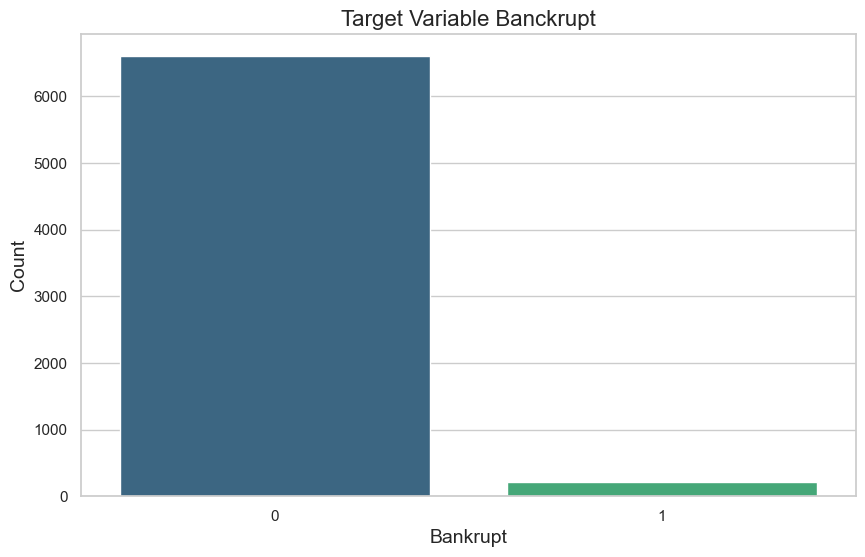

In [20]:
# plotting the targeted variable countplot.
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6)) 
sns.countplot(x='Bankrupt', data=df,  palette='viridis')
plt.title('Target Variable Banckrupt', fontsize=16) 
plt.xlabel('Bankrupt', fontsize=14)
plt.ylabel('Count', fontsize=14) 
plt.xticks(rotation=0)
plt.show()

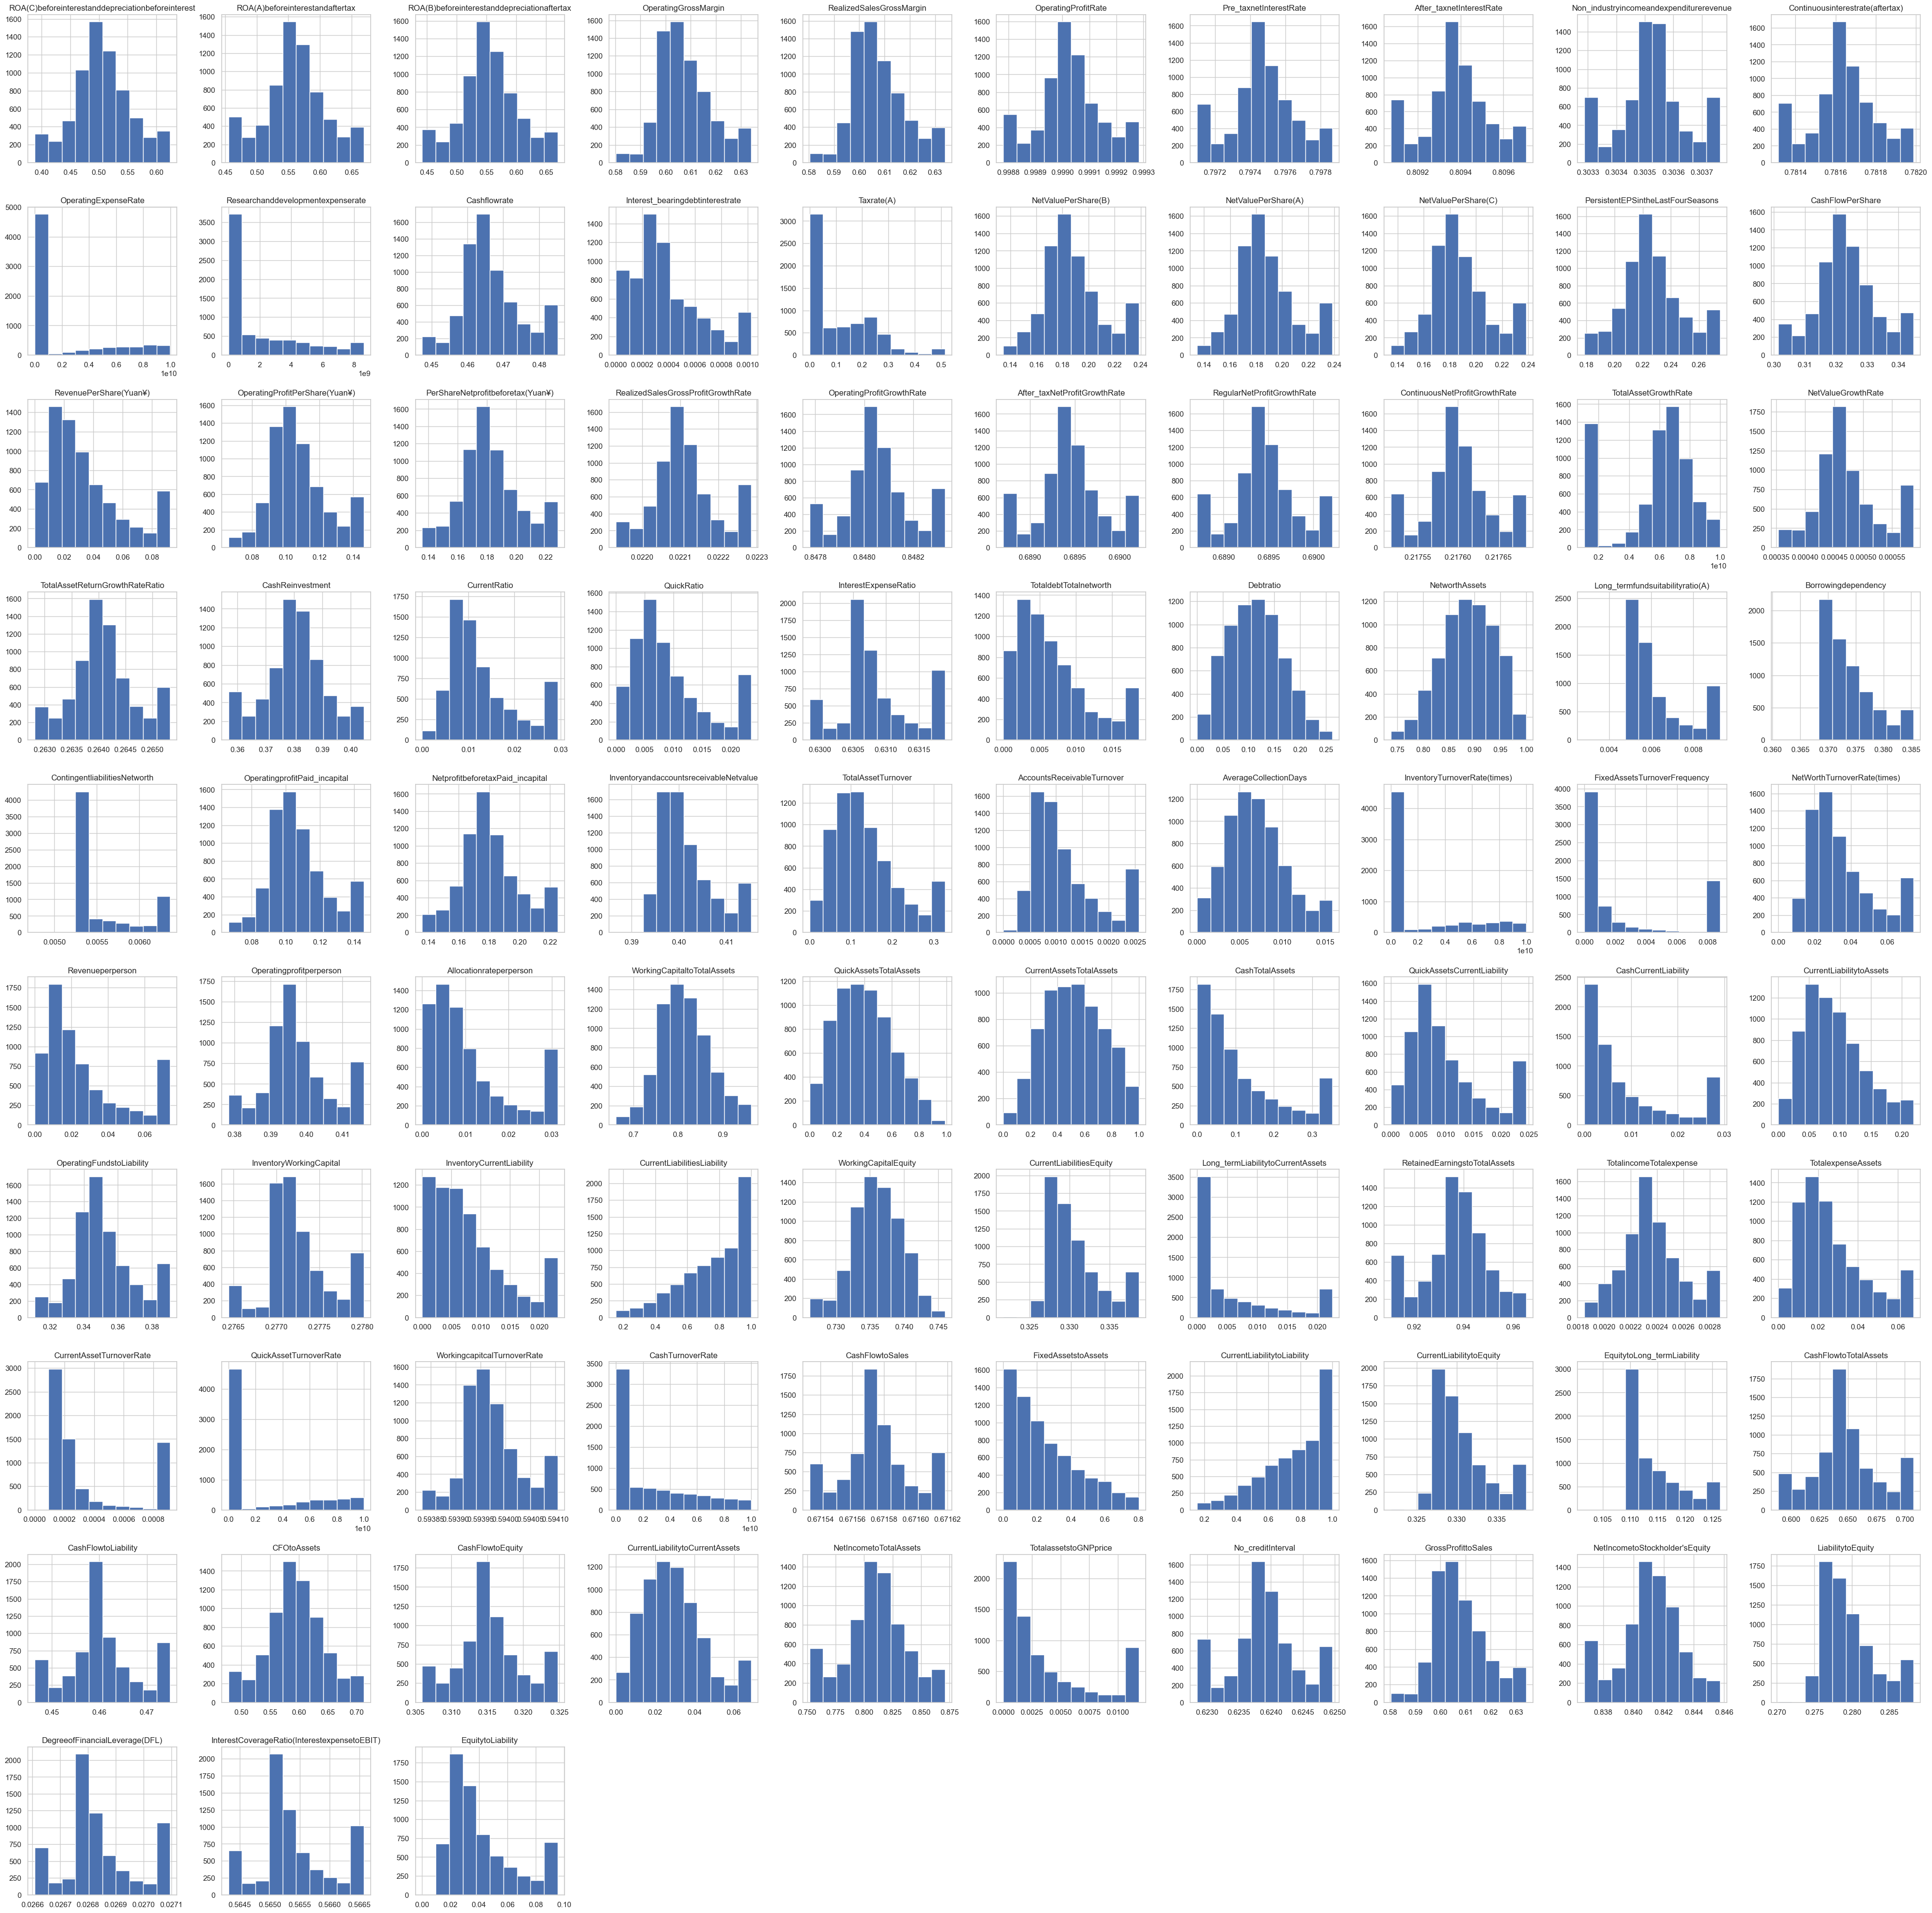

In [21]:
newdf.hist(figsize=(50, 50))
plt.show()


In [22]:
df1=df[['Bankrupt','Liability_AssetsFlag','NetIncomeFlag']]
df1.head()

Bankrupt  Liability_AssetsFlag  NetIncomeFlag
0         1                     0              1
1         1                     0              1
2         1                     0              1
3         1                     0              1
4         1                     0              1

In [23]:
new_df=pd.concat([df1,newdf],axis=1)

In [24]:
new_df.head()

Bankrupt  Liability_AssetsFlag  NetIncomeFlag  \
0         1                     0              1   
1         1                     0              1   
2         1                     0              1   
3         1                     0              1   
4         1                     0              1   

   ROA(C)beforeinterestanddepreciationbeforeinterest  \
0                                           0.387973   
1                                           0.464291   
2                                           0.426071   
3                                           0.399844   
4                                           0.465022   

   ROA(A)beforeinterestandaftertax  \
0                         0.455122   
1                         0.538214   
2                         0.499019   
3                         0.455122   
4                         0.538432   

   ROA(B)beforeinterestanddepreciationaftertax  OperatingGrossMargin  \
0                                     0.442034              0.601457   
1                                     0.516730              0.610235   
2                                     0.472295              0.601450   
3                                     0.457733              0.583541   
4                                     0.522298              0.598783   

   RealizedSalesGrossMargin  OperatingProfitRate  Pre_taxnetInterestRate  \
0                  0.601457             0.998969                0.797096   
1                  0.610235             0.998946                0.797380   
2                  0.601364             0.998857                0.797096   
3                  0.583541             0.998781                0.797096   
4                  0.598783             0.998973                0.797366   

   After_taxnetInterestRate  Non_industryincomeandexpenditurerevenue  \
0                  0.809075                                 0.303288   
1                  0.809301                                 0.303556   
2                  0.809075                                 0.303288   
3                  0.809075                                 0.303350   
4                  0.809304                                 0.303475   

   Continuousinterestrate(aftertax)  OperatingExpenseRate  \
0                          0.781314          1.256969e-04   
1                          0.781506          2.897851e-04   
2                          0.781314          2.361297e-04   
3                          0.781314          1.078888e-04   
4                          0.781550          7.890000e+09   

   Researchanddevelopmentexpenserate  Cashflowrate  \
0                                0.0      0.458143   
1                                0.0      0.461867   
2                         25500000.0      0.458521   
3                                0.0      0.465705   
4                                0.0      0.462746   

   Interest_bearingdebtinterestrate  Taxrate(A)  NetValuePerShare(B)  \
0                          0.000725         0.0             0.147950   
1                          0.000647         0.0             0.182251   
2                          0.000790         0.0             0.177911   
3                          0.000449         0.0             0.154187   
4                          0.000686         0.0             0.167502   

   NetValuePerShare(A)  NetValuePerShare(C)  \
0             0.147950             0.147950   
1             0.182251             0.182251   
2             0.177911             0.193713   
3             0.154187             0.154187   
4             0.167502             0.167502   

   PersistentEPSintheLastFourSeasons  CashFlowPerShare  \
0                           0.178548          0.311664   
1                           0.208944          0.318137   
2                           0.180581          0.307102   
3                           0.193722          0.321674   
4                           0.212537          0.319162   

   RevenuePerShare(Yuan¥)  OperatingProfitPe

In [65]:
# Compute correlations
correlations = new_df.corr()['Bankrupt'].sort_values(ascending=False)

# Display correlations for features
print(correlations)

Bankrupt                                             1.000000
Borrowingdependency                                  0.278367
TotaldebtTotalnetworth                               0.272914
Debtratio                                            0.246535
LiabilitytoEquity                                    0.246176
CurrentLiabilitytoCurrentAssets                      0.229231
CurrentLiabilitiesEquity                             0.216619
CurrentLiabilitytoEquity                             0.216619
CurrentLiabilitytoAssets                             0.193564
EquitytoLong_termLiability                           0.140383
Liability_AssetsFlag                                 0.139212
Allocationrateperperson                              0.113516
InventoryandaccountsreceivableNetvalue               0.104791
TotalexpenseAssets                                   0.102058
Interest_bearingdebtinterestrate                     0.097928
Long_termLiabilitytoCurrentAssets                    0.092509
FixedAss

In [66]:
correlation_matrix = new_df.corr()

In [67]:
new_df.corr()

Bankrupt  \
Bankrupt                                           1.000000   
Liability_AssetsFlag                               0.139212   
NetIncomeFlag                                           NaN   
ROA(C)beforeinterestanddepreciationbeforeinterest -0.239543   
ROA(A)beforeinterestandaftertax                   -0.239500   
ROA(B)beforeinterestanddepreciationaftertax       -0.241993   
OperatingGrossMargin                              -0.140042   
RealizedSalesGrossMargin                          -0.139272   
OperatingProfitRate                               -0.193856   
Pre_taxnetInterestRate                            -0.238036   
After_taxnetInterestRate                          -0.239484   
Non_industryincomeandexpenditurerevenue           -0.214507   
Continuousinterestrate(aftertax)                  -0.248585   
OperatingExpenseRate                              -0.006083   
Researchanddevelopmentexpenserate                 -0.024764   
Cashflowrate                                      -0.120201   
Interest_bearingdebtinterestrate                   0.097928   
Taxrate(A)                                        -0.121220   
NetValuePerShare(B)                               -0.214143   
NetValuePerShare(A)                               -0.213725   
NetValuePerShare(C)                               -0.212643   
PersistentEPSintheLastFourSeasons                 -0.256159   
CashFlowPerShare                                  -0.115611   
RevenuePerShare(Yuan¥)                            -0.067166   
OperatingProfitPerShare(Yuan¥)                    -0.190741   
PerShareNetprofitbeforetax(Yuan¥)                 -0.246001   
RealizedSalesGrossProfitGrowthRate                -0.096151   
OperatingProfitGrowthRate                         -0.107083   
After_taxNetProfitGrowthRate                      -0.146503   
RegularNetProfitGrowthRate                        -0.143949   
ContinuousNetProfitGrowthRate                     -0.141603   
TotalAssetGrowthRate                              -0.053331   
NetValueGrowthRate                                -0.216739   
TotalAssetReturnGrowthRateRatio                   -0.114126   
CashReinvestment                                  -0.088168   
CurrentRatio                                      -0.154300   
QuickRatio                                        -0.158537   
InterestExpenseRatio                              -0.109211   
TotaldebtTotalnetworth                             0.272914   
Debtratio                                          0.246535   
NetworthAssets                                    -0.246535   
Long_termfundsuitabilityratio(A)                  -0.078714   
Borrowingdependency                                0.278367   
ContingentliabilitiesNetworth                      0.033151   
OperatingprofitPaid_incapital                     -0.190264   
NetprofitbeforetaxPaid_incapital                  -0.247467   
InventoryandaccountsreceivableNetvalue             0.104791   
TotalAssetTurnover                                -0.078190   
AccountsReceivableTurnover                        -0.014209   
AverageCollectionDays                              0.042544   
InventoryTurnoverRate(times)                      -0.001376   
FixedAssetsTurnoverFrequency                       0.077481   
NetWorthTurnoverRate(times)                        0.018950   
Revenueperperson                                   0.025917   
Operatingprofitperperson                          -0.180514   
Allocationrateperperson                            0.113516   
WorkingCapitaltoTotalAssets                       -0.193536   
QuickAssetsTotalAssets                            -0.086383   
CurrentAssetsTotalAssets                          -0.044823   
CashTotalAssets                                   -0.115155   
QuickAssetsCurrentLiability                       -0.151713   
CashCurrentLiability                              -0.088781   
CurrentLiabilitytoAssets                           0.193564   
OperatingFundstoLia

# Step 3: Hypothesis Testing

# One Way Anova Test

In [68]:


# One Way Anova Test
# Null Hypotysis [H0] LiabilitytoEquity is not influence on Bankrupt.
# Alternative Hypothesis (H1): The LiabilitytoEquity has a significant influence on the bankrupt.

df_Ano = new_df[['Bankrupt','LiabilitytoEquity']]
df_Ano.head(10)

Bankrupt  LiabilitytoEquity
0         1           0.288207
1         1           0.283846
2         1           0.288207
3         1           0.281721
4         1           0.278514
5         1           0.285087
6         0           0.288207
7         0           0.278607
8         0           0.276423
9         0           0.279388

In [69]:
mod1 = ols('LiabilitytoEquity ~ Bankrupt', data=df_Ano).fit() # here we are checking that LiabilitytoEquity is depend on Bankrupt

In [72]:
table = sm.stats.anova_lm(mod1)

In [73]:
print(table)  # F(439.780814) this is the singnificant value, PR(>F)(1.121240e-94) this is the p-value

              df    sum_sq   mean_sq           F        PR(>F)
Bankrupt     1.0  0.005255  0.005255  439.780814  1.121240e-94
Residual  6817.0  0.081452  0.000012         NaN           NaN


In [74]:
res = pairwise_tukeyhsd(df_Ano.LiabilitytoEquity, df_Ano.Bankrupt)

In [75]:
print(res)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
     0      1    0.005   0.0 0.0045 0.0054   True
-------------------------------------------------


# Feature Engineering and Selection:

In [34]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [76]:
from sklearn.preprocessing import StandardScaler

from imblearn.over_sampling import SMOTE

In [77]:
# Separate the features and the target variable
X = df.drop(columns=['Bankrupt','NetIncomeFlag'])  # Features
y = df['Bankrupt']  # Target variable

# Splitting data into training (75%) and testing (25%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=20)

In [78]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE to the training data if dealing with imbalanced classes
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_scaled, y_train)

In [79]:
# Feature selection using RFE
num_features_to_select = 47  # Adjust this number based on your dataset size and complexity
rfe = RFE(estimator=LogisticRegression(max_iter=1000, random_state=42), n_features_to_select=num_features_to_select)
rfe.fit(X_train_res, y_train_res)

# Get selected feature indices
selected_indices = rfe.get_support(indices=True)

In [80]:
# Subset features based on selected indices
X_train_selected = X_train_res[:, selected_indices]
X_test_selected = X_test_scaled[:, selected_indices]  # Apply the same subset to the test set

# Build logistic regression model with selected features on training data
model_selected = LogisticRegression(max_iter=1000, random_state=42)
model_selected.fit(X_train_selected, y_train_res)

LogisticRegression(max_iter=1000, random_state=42)

In [81]:
# Get selected feature indices
selected_indices = rfe.get_support(indices=True)

# Make predictions on the training set
y_pred_train_selected = model_selected.predict(X_train_selected)


Model Evaluation Metrics on Test Data with selected features:
Accuracy: 0.8680351906158358
Confusion Matrix:
 [[1443  215]
 [  10   37]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.87      0.93      1658
           1       0.15      0.79      0.25        47

    accuracy                           0.87      1705
   macro avg       0.57      0.83      0.59      1705
weighted avg       0.97      0.87      0.91      1705



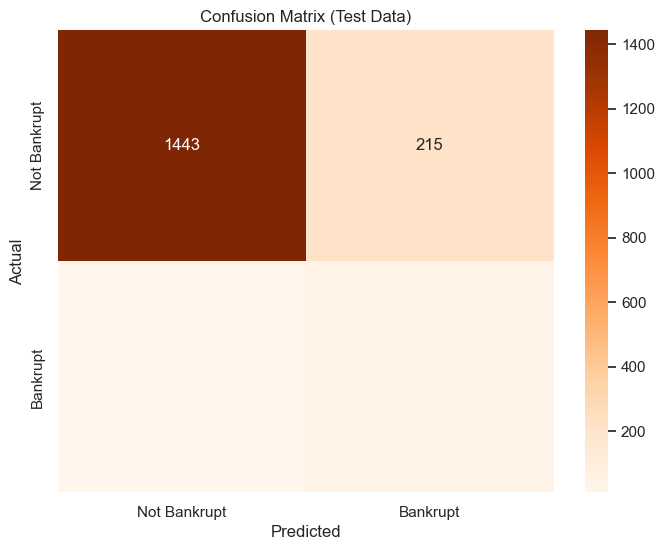

In [82]:
y_pred_test_selected = model_selected.predict(X_test_selected)

# Evaluate the model with selected features on test data
print("\nModel Evaluation Metrics on Test Data with selected features:")
print("Accuracy:", accuracy_score(y_test, y_pred_test_selected))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test_selected))
print("Classification Report:\n", classification_report(y_test, y_pred_test_selected))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_test_selected)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=['Not Bankrupt', 'Bankrupt'], yticklabels=['Not Bankrupt', 'Bankrupt'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Test Data)')
plt.show()


Model Evaluation Metrics on Training Data with selected features:
Accuracy: 0.8994130742764622
Confusion Matrix:
 [[4330  611]
 [ 383 4558]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.88      0.90      4941
           1       0.88      0.92      0.90      4941

    accuracy                           0.90      9882
   macro avg       0.90      0.90      0.90      9882
weighted avg       0.90      0.90      0.90      9882



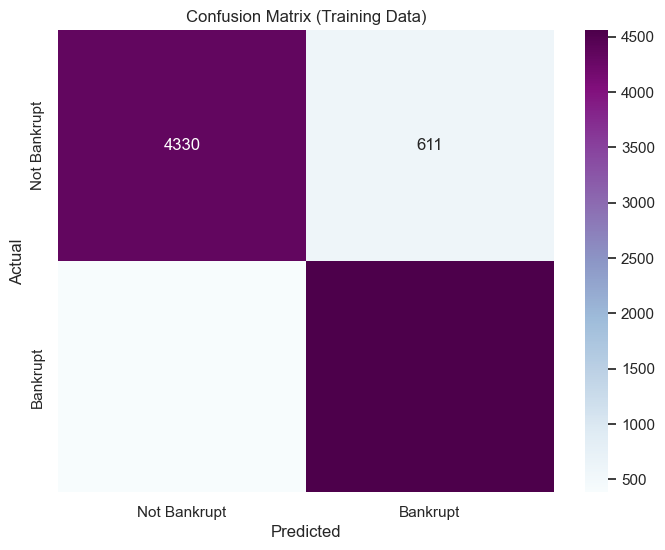

In [83]:
# Evaluate the model with selected features on training data
print("\nModel Evaluation Metrics on Training Data with selected features:")
print("Accuracy:", accuracy_score(y_train_res, y_pred_train_selected))
print("Confusion Matrix:\n", confusion_matrix(y_train_res, y_pred_train_selected))
print("Classification Report:\n", classification_report(y_train_res, y_pred_train_selected))

# Plot confusion matrix
cm = confusion_matrix(y_train_res, y_pred_train_selected)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='BuPu', xticklabels=['Not Bankrupt', 'Bankrupt'], yticklabels=['Not Bankrupt', 'Bankrupt'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Training Data)')
plt.show()

## Logistic Regression

In [92]:
# Null Hypotysis [H0] selected_features is not influence on Bankrupt.
# Alternative Hypothesis (H1): The selected_features has a significant influence on the bankrupt.


selected_features = ['Long_termfundsuitabilityratio(A)',
       'Borrowingdependency', 'Contingentliabilities_Networth',
       'Operatingprofit_Paid_incapital', 'Netprofitbeforetax_Paid_incapital',
       'Inventoryandaccountsreceivable_Netvalue', 'TotalAssetTurnover',
       'AccountsReceivableTurnover', 'AverageCollectionDays',
       'InventoryTurnoverRate(times)', 'FixedAssetsTurnoverFrequency'
]
X = new_df[selected_features]
y = new_df['Bankrupt']

#

# Split the data into training and test sets
#X_train_selected, X_test, y_train_res, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add a constant to the model (for intercept)
X_train_selected = sm.add_constant(X_train_selected,prepend=False)
X_test_selected = sm.add_constant(X_test_selected,prepend=False)

# Train a logistic regression model using statsmodels
logit_model = sm.Logit(y_train_res, X_train_selected)
result = logit_model.fit()

# Print the summary of the model
print(result.summary())

# Make predictions on the test set
y_pred_prob = result.predict(X_test_selected)
y_pred = (y_pred_prob > 0.5).astype(int)


conf_matrix = confusion_matrix(y_test_res, y_pred)

print(conf_matrix)





KeyError: "['Contingentliabilities_Networth', 'Operatingprofit_Paid_incapital', 'Netprofitbeforetax_Paid_incapital', 'Inventoryandaccountsreceivable_Netvalue'] not in index"

# 6.1

In [89]:
# Get the coefficients
coefficients = pd.DataFrame(logistic_model.coef_.T, index=X_train.columns, columns=['Coefficient'])

# Display the coefficients
coefficients.sort_values(by='Coefficient', ascending=False)


Coefficient
Liability_AssetsFlag                               1.266568e-20
TotaldebtTotalnetworth                             2.947980e-21
CurrentLiabilitytoCurrentAssets                    5.963162e-22
Long_termLiabilitytoCurrentAssets                  2.305470e-22
Interest_bearingdebtinterestrate                  -9.663415e-23
CurrentAssetTurnoverRate                          -2.385600e-22
NetValueGrowthRate                                -4.547011e-22
TotalassetstoGNPprice                             -5.161062e-22
FixedAssetsTurnoverFrequency                      -9.708779e-22
AccountsReceivableTurnover                        -1.009864e-21
Allocationrateperperson                           -1.488532e-21
TotalincomeTotalexpense                           -2.045733e-21
ContingentliabilitiesNetworth                     -3.966765e-21
AverageCollectionDays                             -4.061061e-21
Debtratio                                         -4.287260e-21
Long_termfundsuitabilityratio(A)                  -5.693995e-21
InventoryCurrentLiability                         -7.428147e-21
CurrentLiabilitytoAssets                          -1.051294e-20
TotalexpenseAssets                                -1.304445e-20
Revenueperperson                                  -1.357783e-20
QuickRatio                                        -1.474018e-20
QuickAssetsCurrentLiability                       -1.512739e-20
CashCurrentLiability                              -1.543607e-20
RealizedSalesGrossProfitGrowthRate                -1.634679e-20
CurrentRatio                                      -1.808350e-20
DegreeofFinancialLeverage(DFL)                    -1.983110e-20
NetWorthTurnoverRate(times)                       -2.168360e-20
RevenuePerShare(Yuan¥)                            -3.276990e-20
EquitytoLiability                                 -5.737380e-20
EquitytoLong_termLiability                        -7.997488e-20
FixedAssetstoAssets                               -8.117670e-20
OperatingprofitPaid_incapital                     -9.763250e-20
OperatingProfitPerShare(Yuan¥)                    -9.803706e-20
TotalAssetTurnover                                -1.296460e-19
Taxrate(A)                                        -1.422512e-19
ContinuousNetProfitGrowthRate                     -1.601398e-19
NetprofitbeforetaxPaid_incapital                  -1.633821e-19
PerShareNetprofitbeforetax(Yuan¥)                 -1.663692e-19
NetValuePerShare(C)                               -1.669574e-19
NetValuePerShare(A)                               -1.671573e-19
NetValuePerShare(B)                               -1.671625e-19
TotalAssetReturnGrowthRateRatio                   -1.949018e-19
CashTotalAssets                                   -2.002683e-19
LiabilitytoEquity                                 -2.003097e-19
PersistentEPSintheLastFourSeasons                 -2.015759e-19
InventoryWorkingCapital                           -2.039874e-19
Non_industryincomeandexpenditurerevenue           -2.234821e-19
CashFlowtoEquity                                  -2.364488e-19
CurrentLiabilitiesEquity                          -2.386201e-19
CurrentLiabilitytoEquity                          -2.386201e-19
CashFlowPerShare                                  -2.429649e-19
Borrowingdependency                               -2.672121e-19
OperatingFundstoLiability                         -2.686780e-19
CashReinvestment                                  -2.836406e-19
InventoryandaccountsreceivableNetvalue            -2.909096e-19
Operatingprofitperperson                          -3.013223e-19
CashFlowtoLiability                               -3.447024e-19
Cashflowrate                                      -3.478063e-19
InterestCoverageRatio(InterestexpensetoEBIT)      -4.162748e-19
WorkingcapitcalTurnoverRate                       -4.370873e-19
ROA(C)beforeinterestanddepreciationbeforeinterest -4.465432e-19
QuickAssetsTotalAssets                            -4.526080e-19
RealizedSalesGrossMa